#Packages and Upload data

In [ ]:
#Install packages not already in Colab
!pip install --upgrade plotly
!pip install pysal
!pip install pyyaml==5.4.1
!pip install contextily
!pip install cmdstanpy==0.9.68

#exit()

     |████████████████████████████████| 27.7 MB 26.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
     |████████████████████████████████| 5.7 MB 23.9 MB/s 
     |████████████████████████████████| 95 kB 4.4 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 41 kB 733 kB/s 
     |████████████████████████████████| 209 kB 55.1 MB/s 
     |████████████████████████████████| 81 kB 10.1 MB/s 
     |████████████████████████████████| 2.4 MB 55.7 MB/s 
     |████████████████████████████████| 243 kB 67.4 MB/s 
     |████████████████████████████████| 60 kB 1.9 MB/s 
     |████████████████████████████████| 164 kB 51.4 MB/s 
     |████████████████████████████████| 269 kB 59.3 MB/s 
     |████████████████████████████████| 2.1 MB 52.2 MB/s 
     |████████████████████████████████| 1.0 MB

In [ ]:
# mount "mnt" if you need to upload packages from Google Drive, otherwise mount "drive" --> more stable
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('mnt', force_remount=True)
%cd "/content/mnt/drive/My Drive/Project_X Bayesian"

unset HISTFILE; export PS1="root@ce5de20742d6-bbbb5dcaff76435fbde1993b145e0a54: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@ce5de20742d6-bbbb5dcaff76435fbde1993b145e0a54: umount -f mnt || umount mnt; pkill -9 -x drive
umount: mnt: no mount point specified.
umount: mnt: no mount point specified.
root@ce5de20742d6-bbbb5dcaff76435fbde1993b145e0a54: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@ce5de20742d6-bbbb5dcaff76435fbde1993b145e0a54: ( while `sleep 0.5`; do if [[ -d "mnt" && "$(ls -A mnt)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 675
root@ce5de20742d6-bbbb5dcaff76435fbde1993b145e0a54: cat /tmp/tmp14enuha0/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_instances:10,opendir_timeout_ms:120000,virtual_folders_omit_spaces:true --ine

In [ ]:
# Colab settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# General libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import io
import math
import time
import os
import json
import shutil
import urllib.request
import json
import pickle

# Graphical tools libraries 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px 
import plotly.io as pio
import statsmodels.api as sm

# Spatial Analysis Library
import esda  
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
from pylab import figure, scatter, show

# STAN
import cmdstanpy
import pystan
#cmdstanpy.install_cmdstan()  # very slow
from cmdstanpy import cmdstan_path, CmdStanModel
from pystan import StanModel
import arviz as az

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
tgz_file = 'colab-cmdstan-2.23.0.tar.gz'
tgz_url = 'https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz'
if not os.path.exists(tgz_file):
  urllib.request.urlretrieve(tgz_url, tgz_file)
  shutil.unpack_archive(tgz_file)
  
# Specify CmdStan location via environment variable
os.environ['CMDSTAN'] = './cmdstan-2.23.0'
# Check CmdStan path
cmdstan_path()

('colab-cmdstan-2.23.0.tar.gz', <http.client.HTTPMessage at 0x7f89e1a31950>)

'./cmdstan-2.23.0'

In [ ]:
gdf = gpd.read_file('/content/mnt/MyDrive/Project_X Bayesian/lakechadbasin_data_2015.shp')

gdf.to_file("path_to_GeoJSON _file", driver = "GeoJSON")
with open("path_to_GeoJSON _file") as geofile:
  j_file = json.load(geofile)

gdf

PageName  ...                                           geometry
0        A11  ...  POLYGON ((11.82491 15.97952, 11.82491 16.41353...
1         B9  ...  POLYGON ((10.92659 15.54455, 10.92659 15.97952...
2        B10  ...  POLYGON ((11.37575 15.54455, 11.37575 15.97952...
3        B11  ...  POLYGON ((11.82491 15.54455, 11.82491 15.97952...
4         C8  ...  POLYGON ((10.47744 15.10865, 10.47744 15.54455...
..       ...  ...                                                ...
500      X24  ...  POLYGON ((17.66396 5.78336, 17.66396 6.23303, ...
501      X25  ...  POLYGON ((18.11312 5.78336, 18.11312 6.23303, ...
502      Y21  ...  POLYGON ((16.31649 5.33333, 16.31649 5.78336, ...
503      Y22  ...  POLYGON ((16.76564 5.33333, 16.76564 5.78336, ...
504      Y25  ...  POLYGON ((18.11312 5.33333, 18.11312 5.78336, ...

[505 rows x 9 columns]

In [ ]:
df = gdf[['con_2015', 'PageName'] + [col for col in gdf.columns[3:8]]]
X = gdf[[col for col in gdf.columns[3:8]]]
y = gdf['con_2015']

In [ ]:
feature_id_map = dict()
for feature in j_file['features']:
  feature['id'] = feature["properties"]["PageNumber"]
  feature_id_map[feature["properties"]["PageName"]] = feature["id"]

df['id'] = df['PageName'].apply(lambda x: feature_id_map[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Generate the contiguity matrix W
wq =  lps.weights.Queen.from_dataframe(gdf)
wq.transform = 'r'
W, ids = wq.full() 

# Generate a sparse representation for W, D_sparse and eigenvalues of W
N=505
W_sparse = []
D_sparse = []
for i in range(0, N-1):    #loop over upper triangular part of W to identify neighbor pairs
   for j in range(i+1, N):
      if W[i][j]:
        W_sparse.append([i+1, j+1])
      
     
for i in range(N):
  counter = 0
  for j in range(N):
      if W[i][j]:
        counter += 1
  D_sparse.append(counter)

D_sparse = np.array(D_sparse)
W_sparse = np.array(W_sparse)

eigen = np.linalg.eigvals(W)

# Data exploration

In [ ]:
# Numero di zeri e Percentuale di zeri nei conflitti del 2015

n_nonzeros = np.count_nonzero(y)
n_zeros = len(y) - n_nonzeros
print(n_zeros)
perc_zeros = n_zeros/len(y)
print(perc_zeros)

380
0.7524752475247525


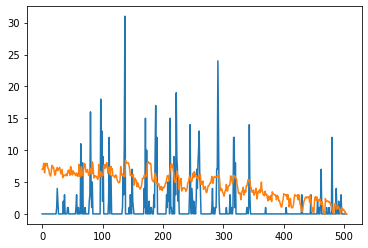

In [ ]:
gdf["con_2015"].plot()  #blu
gdf["wsm_2015"].plot() #arancione

(array([452.,  17.,  14.,   9.,   7.,   3.,   1.,   1.,   0.,   1.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

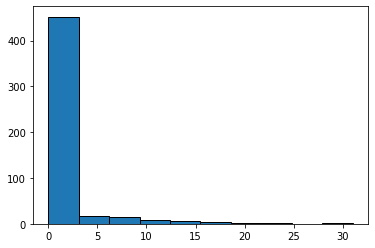

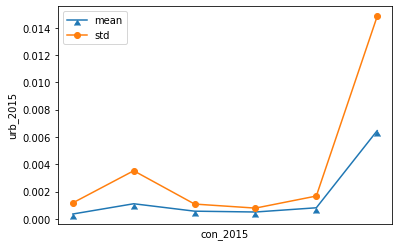

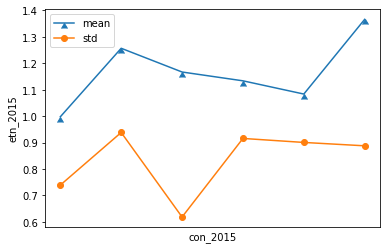

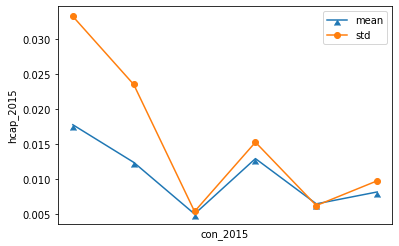

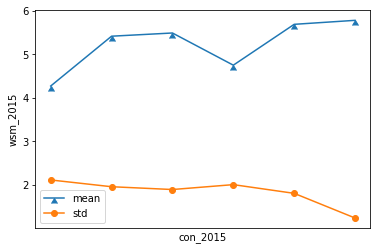

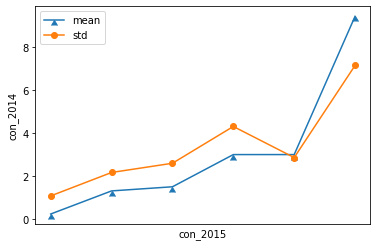

In [ ]:
bins = [0, 1, 2, 3, 5, 30]
plt.hist(y, edgecolor="black")
plt.show()

def plot_mean_std(x, y, feature_name):
  mean_std = []
  mean_std.append((x[y == bins[0]].mean(), x[y == bins[0]].std()))
  mean_std.append((x.loc[(y > bins[0]) & (y <= bins[1]), ].mean(), x.loc[(y > bins[0]) & (y <= bins[1]), ].std()))
  mean_std.append((x.loc[(y > bins[1]) & (y <= bins[2]), ].mean(), x.loc[(y > bins[1]) & (y <= bins[2]), ].std()))
  mean_std.append((x.loc[(y > bins[2]) & (y <= bins[3]), ].mean(), x.loc[(y > bins[2]) & (y <= bins[3]), ].std()))
  mean_std.append((x.loc[(y > bins[3]) & (y <= bins[4]), ].mean(), x.loc[(y > bins[3]) & (y <= bins[4]), ].std()))
  mean_std.append((x[y > bins[4]].mean(), x[y > bins[4]].std()))
  plt.plot([0, 1, 2, 3, 4, 5], [x[0] for x in mean_std], marker = 6)
  plt.plot([0, 1, 2, 3, 4, 5], [x[1] for x in mean_std], marker = 'o')
  
  plt.xticks([])
  plt.ylabel(feature_name)
  plt.xlabel("con_2015")
  plt.legend(['mean', 'std']) # loc="upper right"
  plt.show()

for col in gdf.columns[3:8]:
  #plt.yticks(np.arange(min(gdf[col]), max(gdf[col])+1, 1.5))
  plot_mean_std(gdf[col], y, col)
  

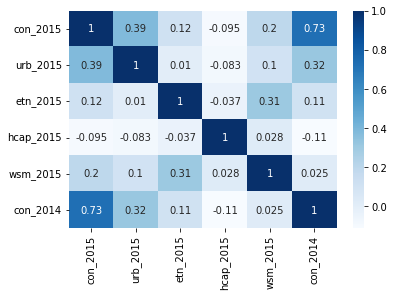

In [ ]:
import seaborn as sns

Var_Corr = gdf[[col for col in gdf.columns[2:8]]].corr() #inserito anche "con_2015"
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="Blues")

#alta correlazione positiva tra conflitti del 2015 e quelli del 2014

In [ ]:
def geoplot(feature_name, df, geojson):
  max_value = df[feature_name].max()
  fig = px.choropleth(df, geojson=geojson, locations='id',       
                      color=feature_name,
                      color_continuous_scale="Viridis",
                      scope="africa"
                      )
  fig.update_geos(fitbounds="locations", visible=False)
  fig.show()

name = "con_2015"
geoplot(name, df, j_file)

name = "con_2014"
geoplot(name, df, j_file)

name = "urb_2015"
geoplot(name, df, j_file)

name = "etn_2015"
geoplot(name, df, j_file)

name = "hcap_2015"
geoplot(name, df, j_file)

name = "wsm_2015"
geoplot(name, df, j_file)



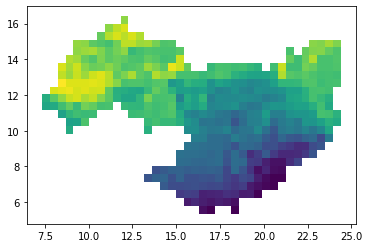

In [ ]:
gdf.plot(column = name)

In [ ]:
def geoplot2(feature_name, df, geojson):
  max_value = df[feature_name].max()
  fig = go.Figure(go.Choroplethmapbox(geojson=geojson, locations=df["id"], z=df[feature_name],
                                      colorscale="Viridis", zmin=0, zmax=max_value,
                                      marker_opacity=0.6, marker_line_width=0))
  fig.update_geos(fitbounds="locations", visible=False)
  fig.update_layout(mapbox_style="carto-positron",
                    mapbox_zoom=4.3, mapbox_center = {"lat": 11, "lon": 15.3})
  fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
  fig.show()
geoplot2("con_2015", df, j_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




Text(0.5, 1.0, 'Queen Neighbor Graph')

(6.726970516545356, 25.007686548377624, 5.026439225212898, 16.72843014844638)

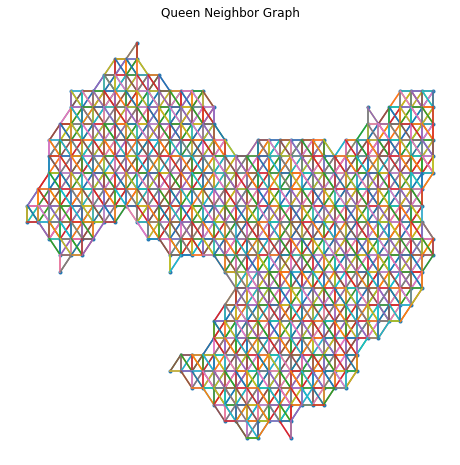

In [ ]:
centroids = gdf.geometry.centroid

fig = figure(figsize=(8,8))

plt.plot(centroids.x, centroids.y,'.')
for k,neighs in wq.neighbors.items():
  #print(k,neighs)
  origin = centroids[k]
  for neigh in neighs:
    segment = centroids[[k,neigh]]
    plt.plot(segment.x, segment.y, '-')
plt.title('Queen Neighbor Graph')
plt.axis('off')
plt.show()

In [ ]:
#indice di moran per "urb_2015"
y = gdf["urb_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.11109657243149565
0.002


In [ ]:
#indice di moran per "etn_2015"
y = gdf["etn_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.550017359828049
0.001


In [ ]:
#indice di moran per "hcap_2015"
y = gdf["hcap_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.5354727891963722
0.001


In [ ]:
#indice di moran per "wsm_2015"
y = gdf["wsm_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.9451069739747726
0.001


In [ ]:
#indice di moran per "con_2014"
y = gdf["con_2014"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.2655506903543081
0.001


In [ ]:
#indice di moran per "con_2015"
y = gdf["con_2015"]
mi = esda.moran.Moran(y, wq)
print(mi.I)
print(mi.p_sim)

0.3482949892563304
0.001


(<Figure size 720x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9149b9f550>,
       dtype=object))

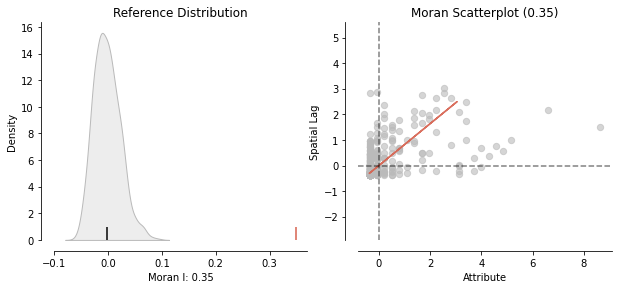

In [ ]:
from splot.esda import plot_moran

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

In [ ]:
mi.p_sim

0.001

Text(0.5, 0, 'Conflicts')

Text(0, 0.5, 'Spatial Lag of Conflicts')

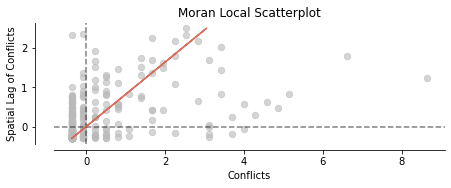

In [ ]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, wq)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Conflicts')
ax.set_ylabel('Spatial Lag of Conflicts')
plt.show()

Text(0.5, 0, 'Conflicts')

Text(0, 0.5, 'Spatial Lag of Conflicts')

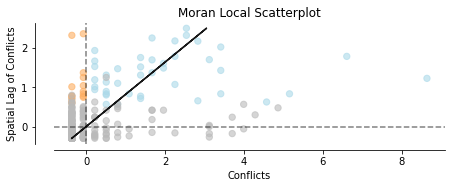

In [ ]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Conflicts')
ax.set_ylabel('Spatial Lag of Conflicts')
plt.show()

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9145c07c50>)

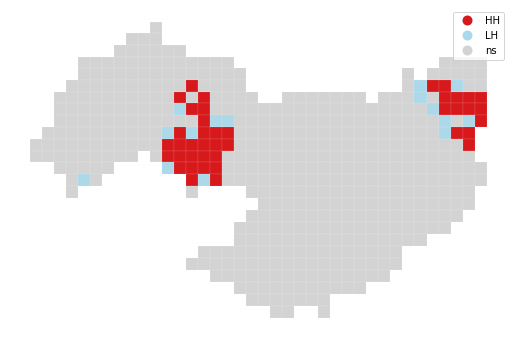

In [ ]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.show()

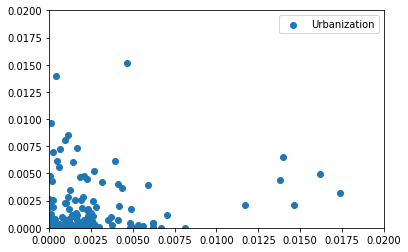

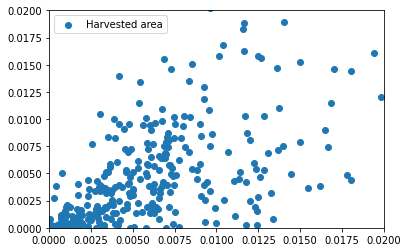

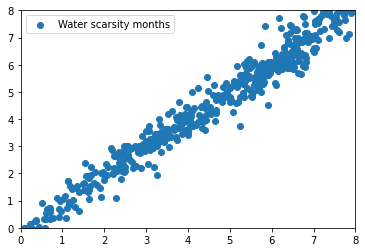

In [ ]:
def plot_lm(W, y, label, range):
  x = W.dot(y)
  xmin, xmax, ymin, ymax = range
  plt.scatter(x, y, label = label)
  plt.axis([xmin, xmax, ymin, ymax])
  plt.legend()
  plt.show()


plot_lm(W, gdf['urb_2015'], "Urbanization", (0, 0.02, 0, 0.02))
plot_lm(W, gdf['hcap_2015'], 'Harvested area', (0, 0.02, 0, 0.02))
plot_lm(W, gdf['wsm_2015'], 'Water scarsity months', (0, 8, 0, 8))

# STAN

# PSAR

In [ ]:
PSAR_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
}

parameters {
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    vector[N] epsilon;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
    vector[N] mu;
    mu = exp(inverse(I-lambda*W)*(X*beta + W*X*gamma + epsilon));
    // mu = exp((I-lambda*W)\(X*beta + W*X*gamma + epsilon));   // more efficient than the previous one
}

model {   
    Y ~ poisson(mu);  
     
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_model, file=f)

PSAR = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y))
}

PSAR_fit = PSAR.sample(data=PSAR_data, chains=4, parallel_chains=4, 
                             iter_warmup=100, iter_sampling=500, verbose = True)

PSAR_cmdstanpy = az.from_cmdstanpy(PSAR_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR.pkl', 'wb') as f:
    pickle.dump(PSAR, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_fit, g)

# PSAR_QR

In [ ]:
PSAR_QR_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
}

parameters {
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    vector[N] epsilon;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
    vector[N] mu;
    matrix[N,N] Q;
    matrix[N,N] R;
    Q = qr_thin_Q(I-lambda*W)
    R = qr_thin_R(I-lambda*W)
    mu = exp(inverse(R)*Q'*(X*beta + W*X*gamma + epsilon));
}

model {   
    Y ~ poisson(mu);  
     
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR_QR_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_QR_model, file=f)

PSAR_QR = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_QR_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y))
}

PSAR_QR_fit = PSAR_QR.sample(data=PSAR_QR_data, chains=4, parallel_chains=4, 
                             iter_warmup=100, iter_sampling=500, verbose = True)

PSAR_QR_cmdstanpy = az.from_cmdstanpy(PSAR_QR_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_QR.pkl', 'wb') as f:
    pickle.dump(PSAR_QR, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_QR_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_QR_fit, g)

# PSAR_prec

In [ ]:
PSAR_prec_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters{
  vector[N] zeros;
  zeros = rep_vector(0, N);
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
}

model {   
    Y ~ poisson_log(X * beta + W*X*gamma + phi);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    phi ~ multi_normal_prec(zeros, (I - lambda*W)'*(I - lambda*W)*tau_epsilon);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(row(X,j)*beta+row(W*X,j)*gamma+phi[j]));
  }
}
"""

stan_file = "./PSAR_prec_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_prec_model, file=f)

PSAR_prec = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_prec_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y))
}

PSAR_prec_fit = PSAR_prec.sample(data=PSAR_prec_data, chains=4, parallel_chains=4, 
                             iter_warmup=100, iter_sampling=500, show_progress = 1)

PSAR_prec_cmdstanpy = az.from_cmdstanpy(PSAR_prec_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_prec.pkl', 'wb') as f:
    pickle.dump(PSAR_prec, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_prec_fit, g)

# PSAR_sparse

In [ ]:
PSAR_model_sparse = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param W Adjacency matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix W, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - W*X*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
}


model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, W, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_sparse.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_sparse, file=f)

PSAR_sparse = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_sparse_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_sparse_fit = PSAR_very_sparse.sample(data=PSAR_very_sparse_data, chains=4, parallel_chains=4,
                                               iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_sparse_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_fit, g)

# PSAR_very_sparse

In [ ]:
PSAR_model_very_sparse = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_very_sparse.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_very_sparse, file=f)

PSAR_very_sparse = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_very_sparse_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_very_sparse_fit = PSAR_very_sparse.sample(data=PSAR_very_sparse_data, chains=4, parallel_chains=4,
                                               iter_warmup=1000, iter_sampling=5000, show_progress = 1)

PSAR_very_sparse_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_fit, g)

# PSAR_very_sparse_simple

In [ ]:
PSAR_model_very_sparse_simple = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, 50);
    gamma ~ normal(0.0, 50);
    logit(lambda) ~ normal(0.0, 5);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_very_sparse_simple.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_very_sparse_simple, file=f)

PSAR_very_sparse_simple = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_very_sparse_simple_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_very_sparse_simple_fit = PSAR_very_sparse_simple.sample(data=PSAR_very_sparse_simple_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=10000, show_progress = 1)

PSAR_very_sparse_simple_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_simple_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_simple, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_simple_fit, g)

# PostProcessing PSAR_very_sparse_simple

In [ ]:
# load a pre-compiled model

model_fit = pickle.load(open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_fit.pkl', 'rb'))
model = az.from_cmdstanpy(model_fit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdd4699a90>,
      dtype=object)

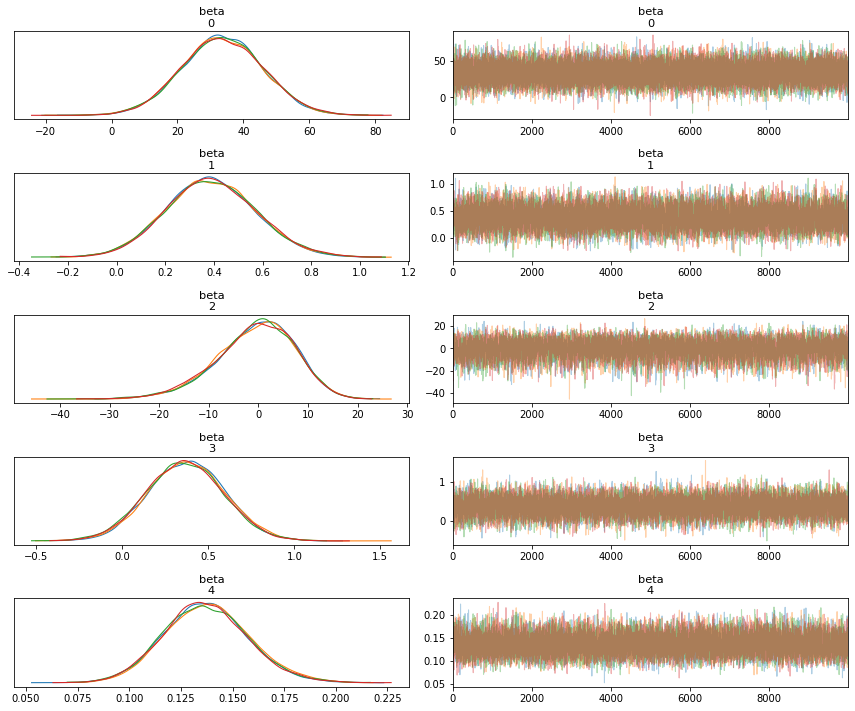

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc8136d10>,
      dtype=object)

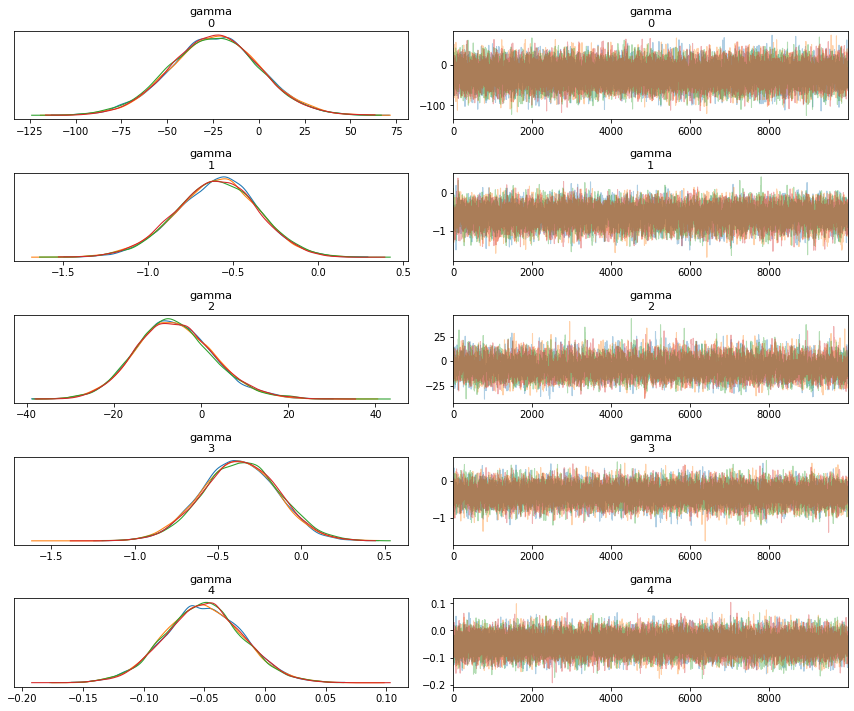

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc7d1c2d0>,
      dtype=object)

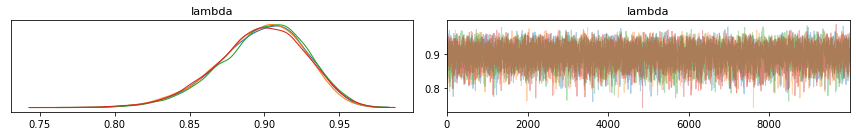

In [ ]:
az.plot_trace(model.posterior.beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.gamma, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior['lambda'], compact=False)
plt.tight_layout()
plt.show()

In [ ]:
np.sum(model.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

<xarray.Dataset>
Dimensions:      (beta_dim_0: 5, gamma_dim_0: 5)
Coordinates:
  * beta_dim_0   (beta_dim_0) int64 0 1 2 3 4
  * gamma_dim_0  (gamma_dim_0) int64 0 1 2 3 4
Data variables:
    beta         (beta_dim_0) float64 2.57e+04 1.027e+04 ... 1.063e+04 1.013e+04
    gamma        (gamma_dim_0) float64 2.346e+04 1.006e+04 ... 1.913e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdd4e71b90>,
      dtype=object)

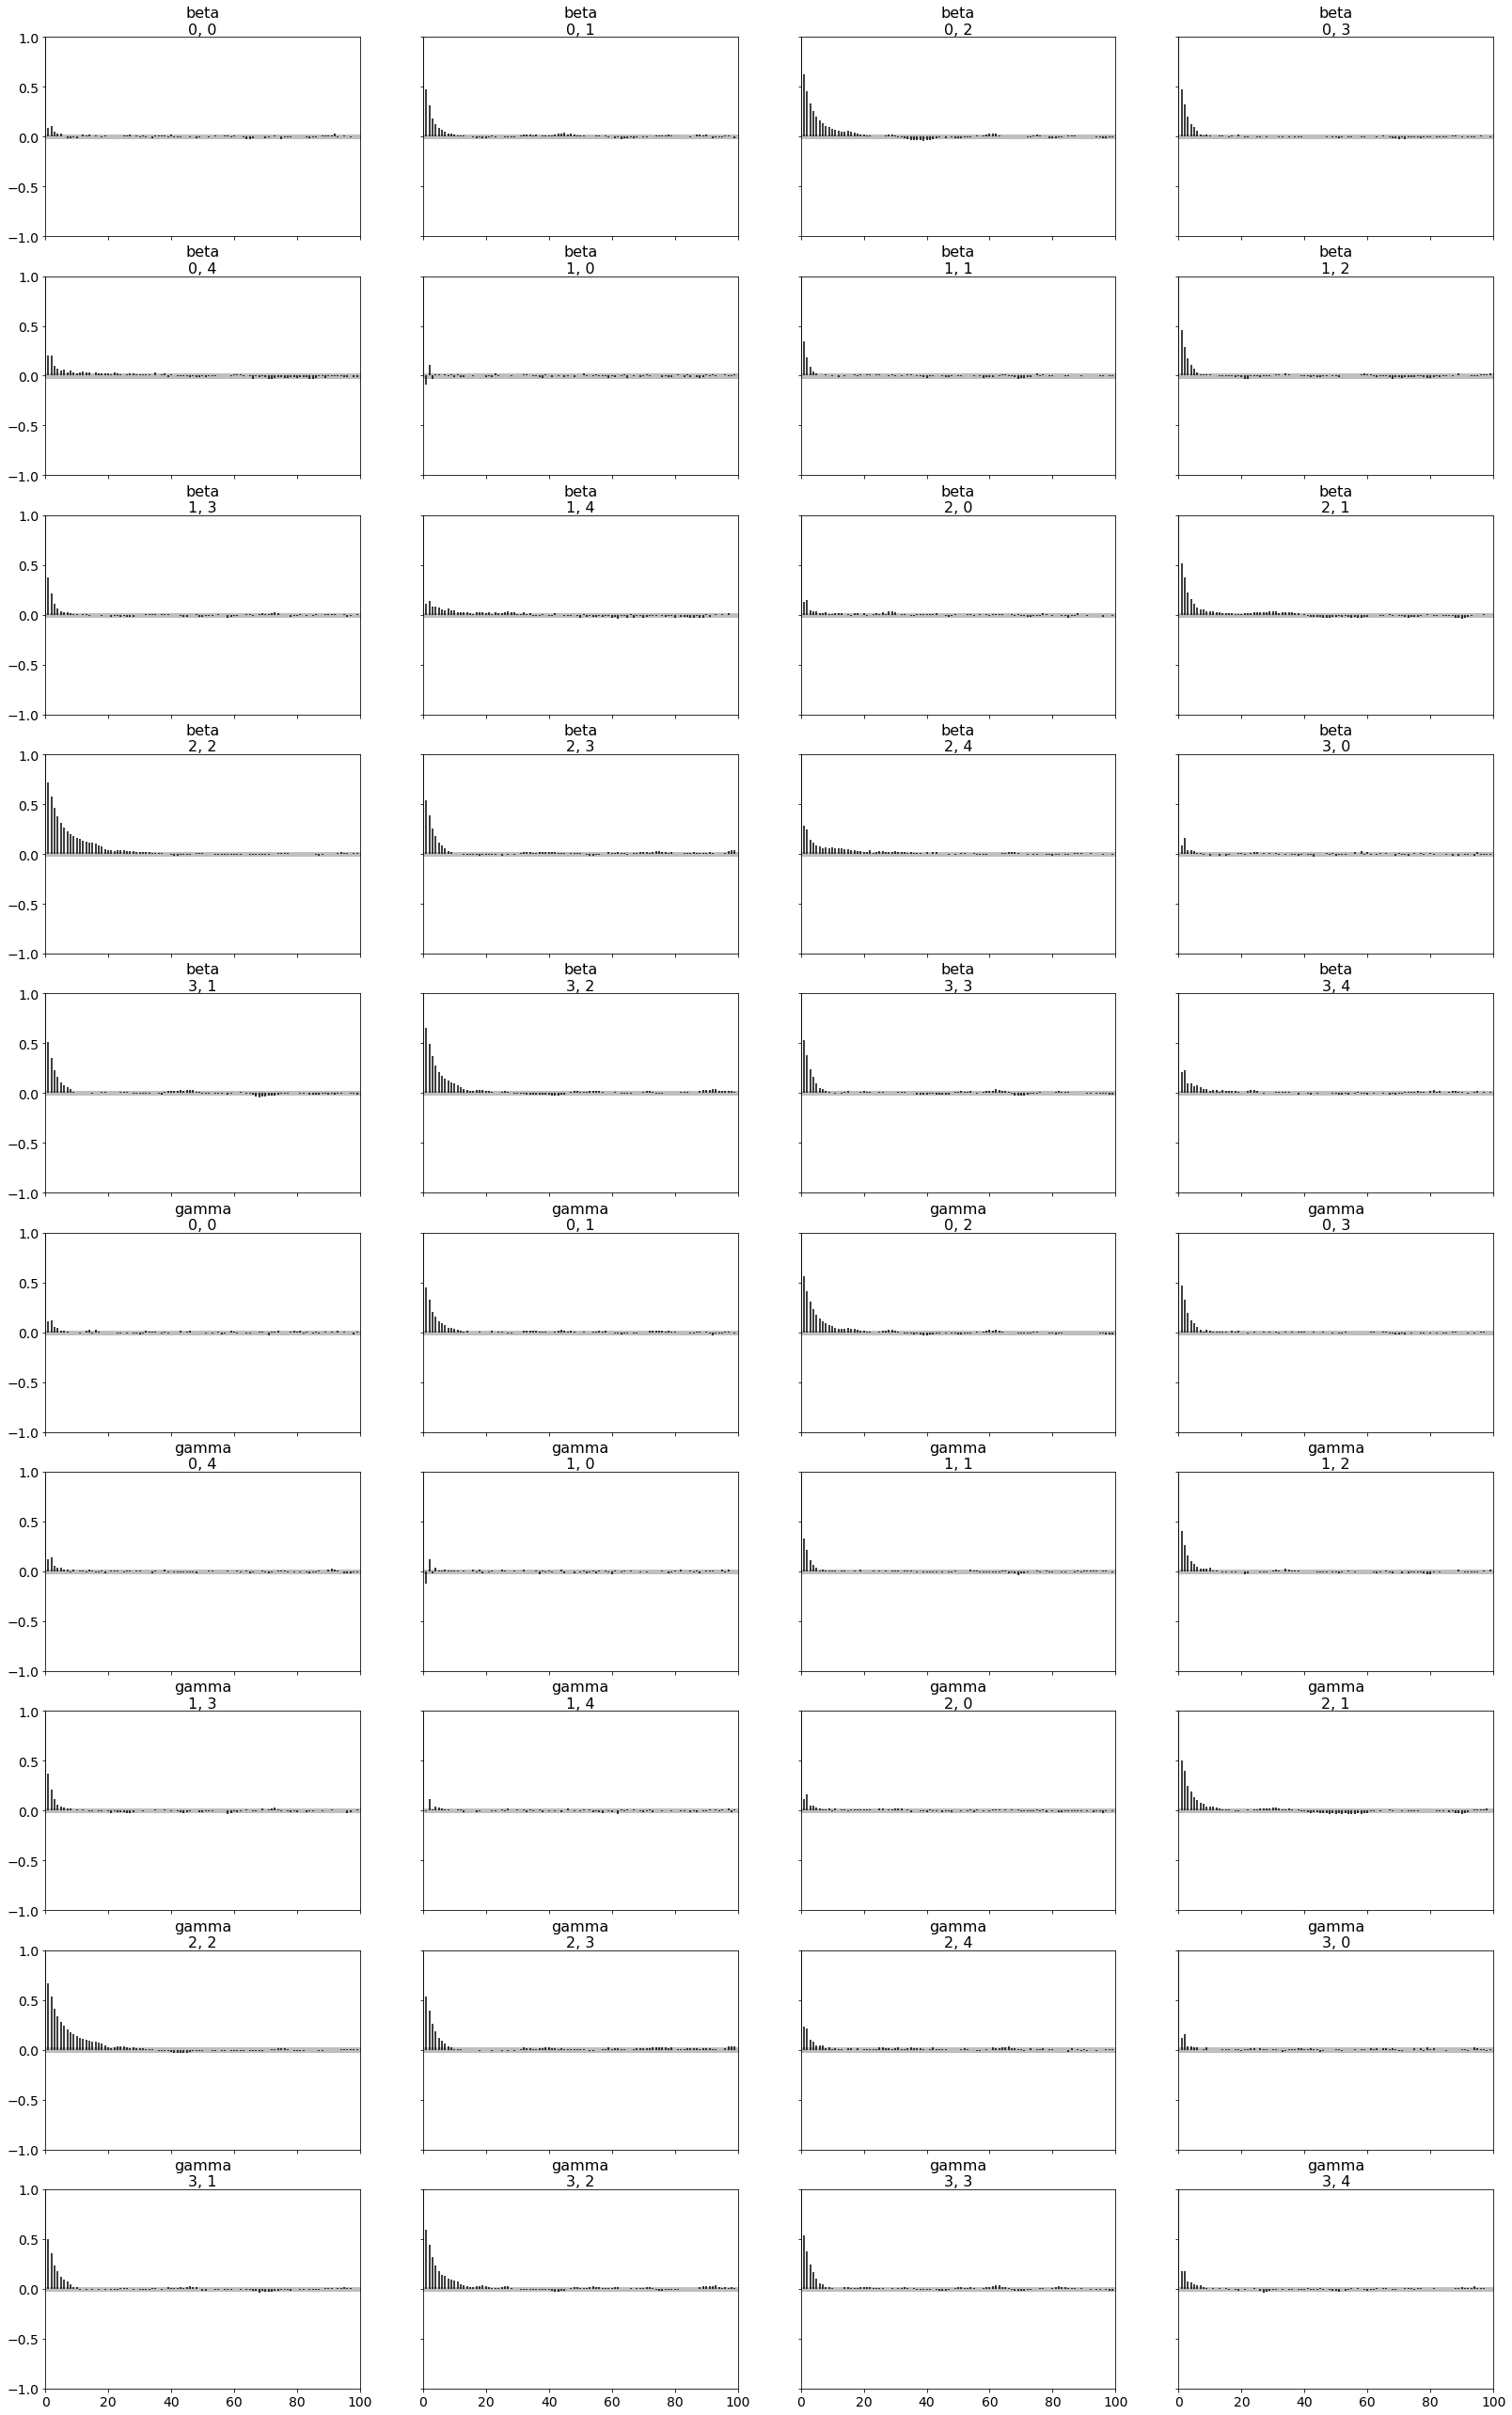

In [ ]:
import arviz as az

chains_az = az.convert_to_inference_data(
    {"beta": model.posterior.beta[:, :, :], "gamma": model.posterior.gamma[:, :, :]})

print(az.ess(chains_az))

az.plot_autocorr(chains_az)
plt.show()

In [ ]:
print("WAIC: ", az.waic(model, var_name="log_lik"))

WAIC:  Computed from 40000 by 505 log-likelihood matrix

          Estimate       SE
elpd_waic  -379.61    24.71
p_waic       90.13        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1460: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


# PSAR_sparse_sym

In [ ]:
PSAR_model_sparse_sym = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param W Adjacency matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix W, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
      vector[N] ldet_terms1;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - W*X*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
      for (i in 1:N) ldet_terms1[i] = 1/D_sparse[i];
      
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) + sum(ldet_terms1) - 0.5*tau_epsilon*(temp)'*(temp);
     
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}


transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  vector[N] eigen;
  vector[N] invsqrtD;  
  for (i in 1:N) {invsqrtD[i] = 1 / sqrt(D_sparse[i]);}
    eigen = eigenvalues_sym(quad_form(diag_matrix(D_sparse)*W, diag_matrix(invsqrtD)));
}


model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, W, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_sparse_sym.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_sparse_sym, file=f)

PSAR_sparse_sym = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_sparse_sym_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "W": W,
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
}

PSAR_sparse_sym_fit = PSAR_sparse_sym.sample(data=PSAR_sparse_sym_data, chains=1,
                             iter_warmup=100, iter_sampling=500, show_progress = 1)

PSAR_sparse_sym_cmdstanpy = az.from_cmdstanpy(PSAR_sparse_sym_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse_sym.pkl', 'wb') as f:
    pickle.dump(PSAR_sparse_sym, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_sparse_sym_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_sparse_sym_fit, g)

# PSAR_very_sparse_sym

In [ ]:
PSAR_model_very_sparse_sym = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
      vector[N] ldet_terms1;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
      for (i in 1:N) ldet_terms1[i] = 1/D_sparse[i];
           
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) + sum(ldet_terms1) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  vector[N] eigen;
  vector[N] invsqrtD;  
  matrix[N,N] DW;
  for (i in 1:N) {invsqrtD[i] = 1 / sqrt(D_sparse[i]);}
  DW = rep_matrix(0,N,N);
  for (i in 1:W_n) {
    DW[W_sparse[i,1],W_sparse[i,2]]=1;
    DW[W_sparse[i,2],W_sparse[i,1]]=1;
  }
  eigen = eigenvalues_sym(quad_form(DW, diag_matrix(invsqrtD)));
  
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 0.02);
    sigma_beta ~ uniform(0.0, 100.0);
    sigma_gamma ~ uniform(0.0, 100.0);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

In [ ]:
PSAR_very_sparse_sym_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
}

PSAR_very_sparse_sym_fit = PSAR_very_sparse_sym.sample(data=PSAR_very_sparse_sym_data, chains=1, 
                             iter_warmup=100, iter_sampling=500, show_progress = 1)

PSAR_very_sparse_sym_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_sym_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_sym.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_sym, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_sym_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_sym_fit, g)

# PSAR_very_sparse_variances

In [ ]:
PSAR_model_very_sparse_variances = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    vector<lower=0>[p] sigma_beta;
    vector<lower=0>[p] sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 2.845);
    sigma_beta ~ uniform(0, 200.0);
    sigma_gamma ~ uniform(0, 200.0);
    sigma_epsilon ~ uniform(0, 200.0);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_very_sparse_variances.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_very_sparse_variances, file=f)

PSAR_very_sparse_variances = CmdStanModel(stan_file = stan_file)

In [ ]:
PSAR_very_sparse_variances_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_very_sparse_variances_fit = PSAR_very_sparse_variances.sample(data=PSAR_very_sparse_variances_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=10000, show_progress = 1)

PSAR_very_sparse_variances_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_variances_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_variances.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_variances, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_variances_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_variances_fit, g)

# PSAR_very_spares_variances_2

In [ ]:
PSAR_model_very_sparse_variances_2 = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

parameters {
    vector[N] phi;
    vector[p] beta; 
    vector[p] gamma;         
    real<lower=0, upper=1> lambda;
    real<lower=0> sigma_beta;
    real<lower=0> sigma_gamma;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

}

model {   
    Y ~ poisson_log(phi);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, sigma_beta);
    gamma ~ normal(0.0, sigma_gamma);
    logit(lambda) ~ normal(0.0, 5);
    sigma_beta ~ inv_gamma(3, 50.0);
    sigma_gamma ~ inv_gamma(3, 50.0);
    sigma_epsilon ~ inv_gamma(2, 3);
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | exp(phi[j]));
  }
}
"""

stan_file = "./PSAR_model_very_sparse_variances_2.stan"

with open(stan_file, "w") as f:
    print(PSAR_model_very_sparse_variances_2, file=f)

PSAR_very_sparse_variances_2 = CmdStanModel(stan_file = stan_file)

INFO:cmdstanpy:compiling stan program, exe file: /content/PSAR_model_very_sparse_variances_2
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /content/PSAR_model_very_sparse_variances_2


In [ ]:
PSAR_very_sparse_variances_data_2 = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}

PSAR_very_sparse_variances_fit_2 = PSAR_very_sparse_variances_2.sample(data=PSAR_very_sparse_variances_data_2, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=10000, show_progress = 1, adapt_delta=0.85)

PSAR_very_sparse_variances_2_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_variances_fit_2)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_variances_2.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_variances_2, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_variances_fit_2.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_variances_fit_2, g)

# PSAR_very_sparse_simple_baseline1

In [ ]:
PSAR_very_sparse_simple_baseline1_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 

    int<lower=0> Y[N];
    matrix[N,p] X;
}

parameters {
    vector[p] beta; 
    vector[N] epsilon;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
    vector[N] mu;
    mu = exp(X*beta + epsilon);
}

model {   
    Y ~ poisson_log(X*beta + epsilon);  
     
    beta ~ normal(0.0, 50);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR__very_sparse_simple_baseline1_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_very_sparse_simple_baseline1_model, file=f)

PSAR_very_sparse_simple_baseline1 = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_very_sparse_simple_baseline1_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
}

PSAR_very_sparse_simple_baseline1_fit = PSAR_very_sparse_simple_baseline1.sample(data=PSAR_very_sparse_simple_baseline1_data, chains=4, parallel_chains=4,
                             iter_warmup=20000, iter_sampling=100000, show_progress = 1, thin = 10)

PSAR_very_sparse_simple_baseline1_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_simple_baseline1_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline1.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_simple_baseline1, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline1_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_simple_baseline1_fit, g)

# PostProcessing PSAR_very_sparse_simple_baseline1

In [ ]:
# load a pre-compiled model

model_fit = pickle.load(open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline1_fit.pkl', 'rb'))
model = az.from_cmdstanpy(model_fit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc8ca5f10>,
      dtype=object)

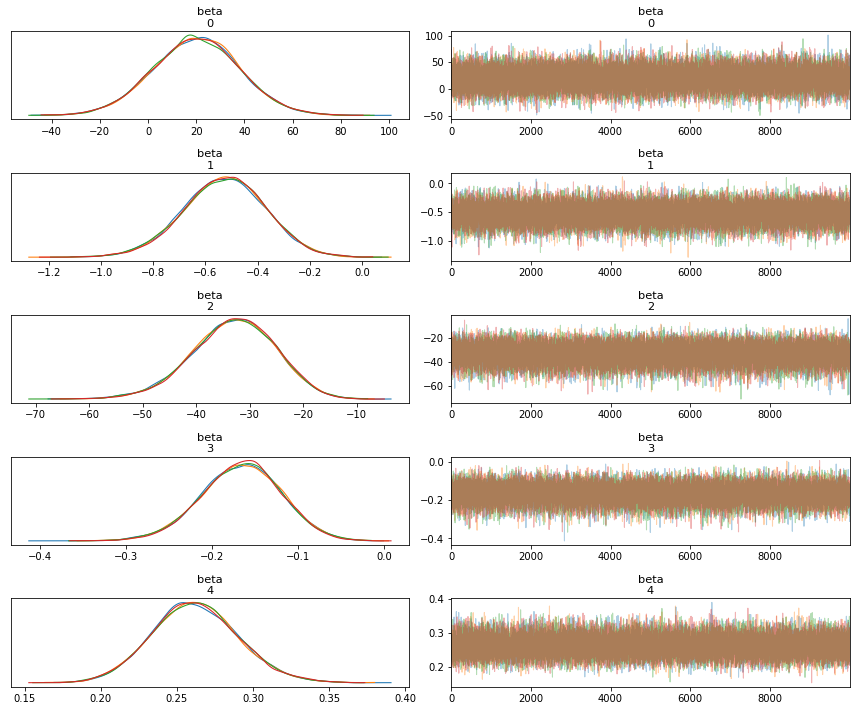

In [ ]:
az.plot_trace(model.posterior.beta, compact=False)
plt.tight_layout()
plt.show()

In [ ]:
np.sum(model.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

<xarray.Dataset>
Dimensions:     (beta_dim_0: 5)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 0 1 2 3 4
Data variables:
    beta        (beta_dim_0) float64 3.907e+04 3.743e+04 ... 3.257e+04 3.451e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc9a8ad90>,
      dtype=object)

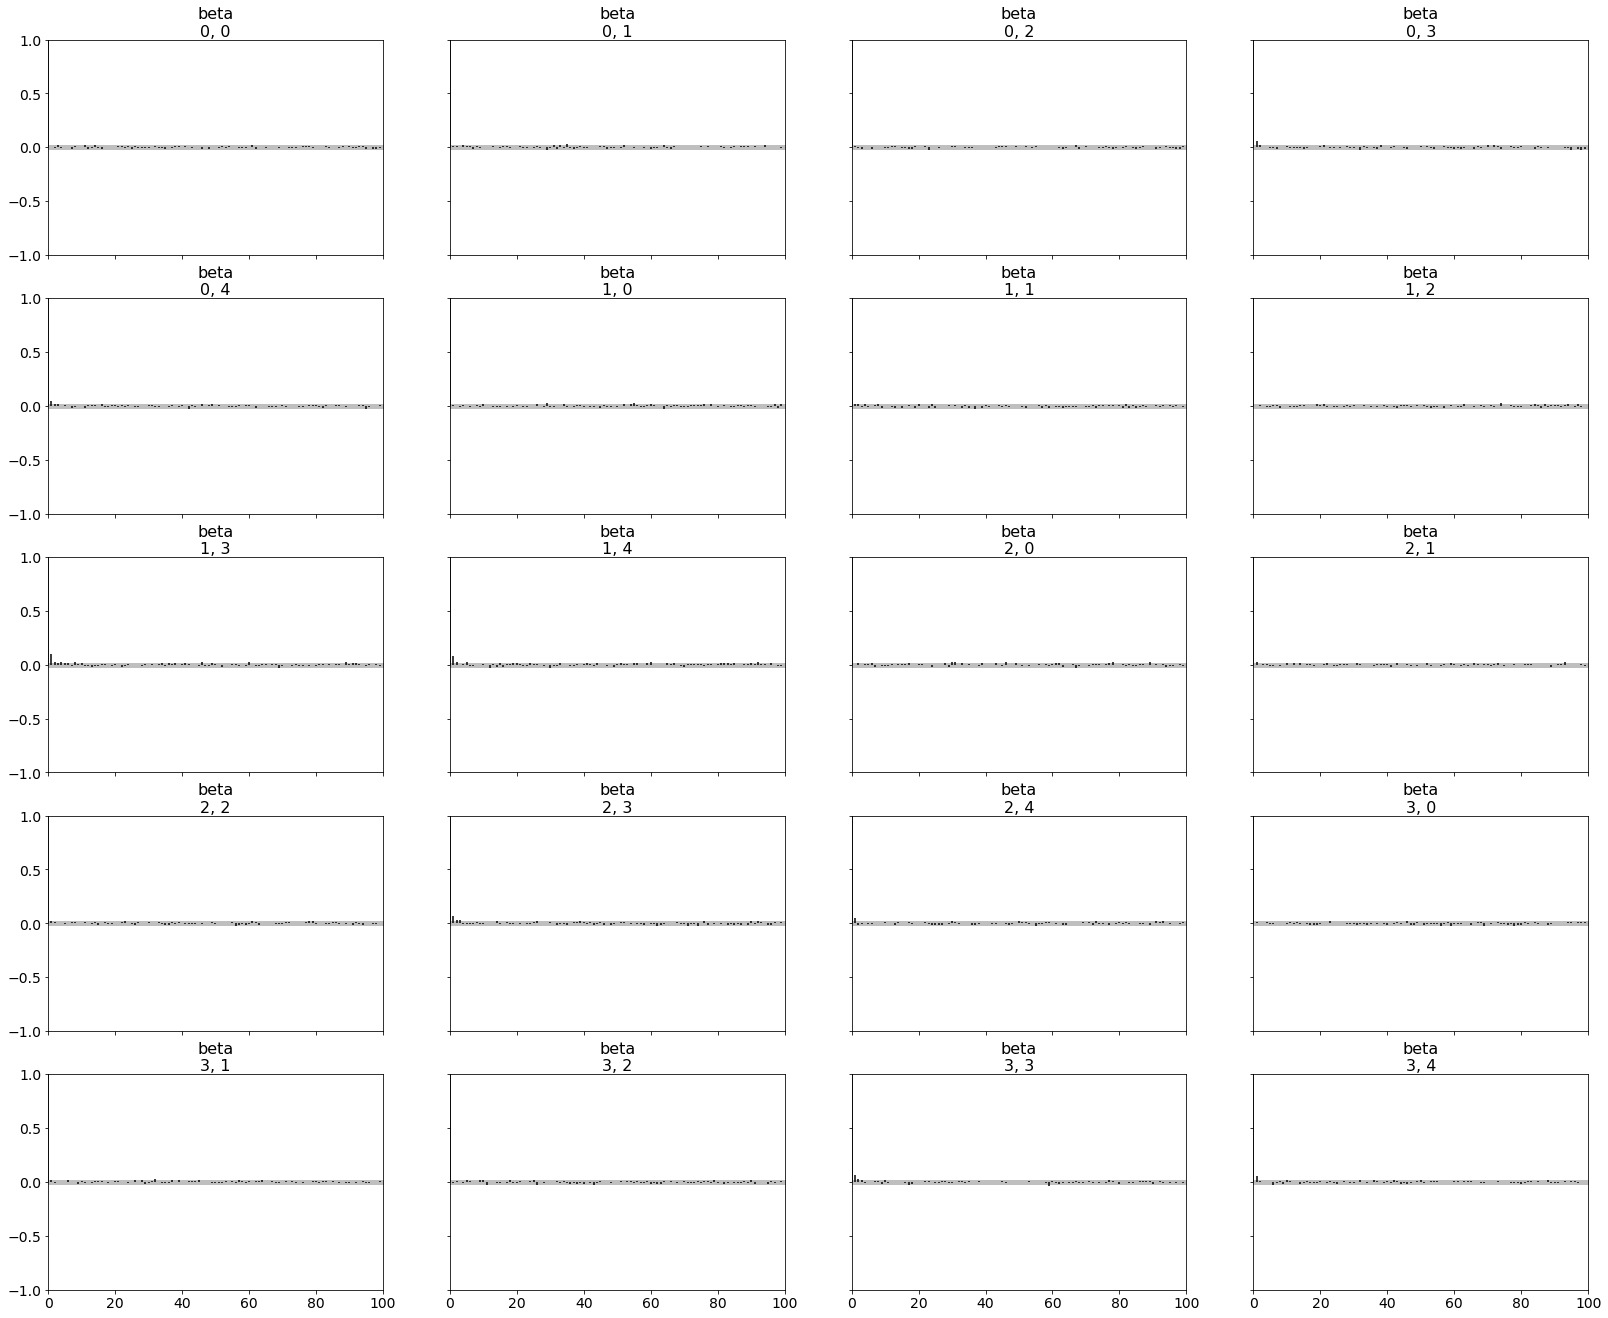

In [ ]:
import arviz as az

chains_az = az.convert_to_inference_data(
    {"beta": model.posterior.beta[:, :, :]})

print(az.ess(chains_az))

az.plot_autocorr(chains_az)
plt.show()

In [ ]:
print("WAIC: ", az.waic(model, var_name="log_lik"))

WAIC:  Computed from 40000 by 505 log-likelihood matrix

          Estimate       SE
elpd_waic  -440.64    22.87
p_waic      126.42        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1460: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


# PSAR_very_sparse_simple_baseline2

In [ ]:
PSAR_very_sparse_simple_baseline2_model = """ 
data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] W;
}

parameters {
    vector[p] beta; 
    vector[p] gamma;         
    vector[N] epsilon;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
    vector[N] mu;
    mu = exp(X*beta + W*X*gamma + epsilon);
}

model {   
    Y ~ poisson_log(X*beta + W*X*gamma + epsilon);  
    
    beta ~ normal(0.0, 50);
    gamma ~ normal(0.0, 50);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_epsilon ~ uniform(0.0, 100.0);
    
}

generated quantities  {
  vector[N] log_lik;
  for (j in 1:N) {
    log_lik[j] = poisson_lpmf(Y[j] | mu[j]);
  }
}
"""

stan_file = "./PSAR_very_sparse_simple_baseline2_model.stan"

with open(stan_file, "w") as f:
    print(PSAR_very_sparse_simple_baseline2_model, file=f)

PSAR_very_sparse_simple_baseline2 = CmdStanModel(stan_file=stan_file)

In [ ]:
PSAR_very_sparse_simple_baseline2_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W": W,
}

PSAR_very_sparse_simple_baseline2_fit = PSAR_very_sparse_simple_baseline2.sample(data=PSAR_very_sparse_simple_baseline2_data, chains=4, parallel_chains=4,
                             iter_warmup=20000, iter_sampling=100000, show_progress = 1)

PSAR_very_sparse_simple_baseline2_cmdstanpy = az.from_cmdstanpy(PSAR_very_sparse_simple_baseline2_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline2.pkl', 'wb') as f:
    pickle.dump(PSAR_very_sparse_simple_baseline2, f)

with open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline2_fit.pkl', 'wb') as g:
    pickle.dump(PSAR_very_sparse_simple_baseline2_fit, g)

# PostProcessing PSAR_very_sparse_simple_baseline2

In [ ]:
# load a pre-compiled model

model_fit = pickle.load(open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_baseline2_fit.pkl', 'rb'))
model = az.from_cmdstanpy(model_fit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc93630d0>,
      dtype=object)

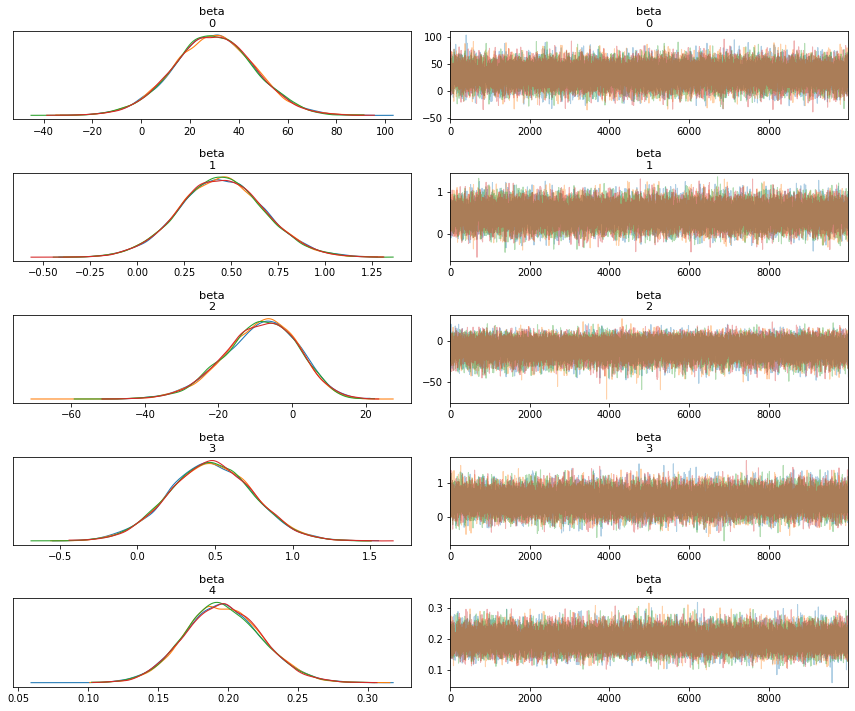

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc68aab10>,
      dtype=object)

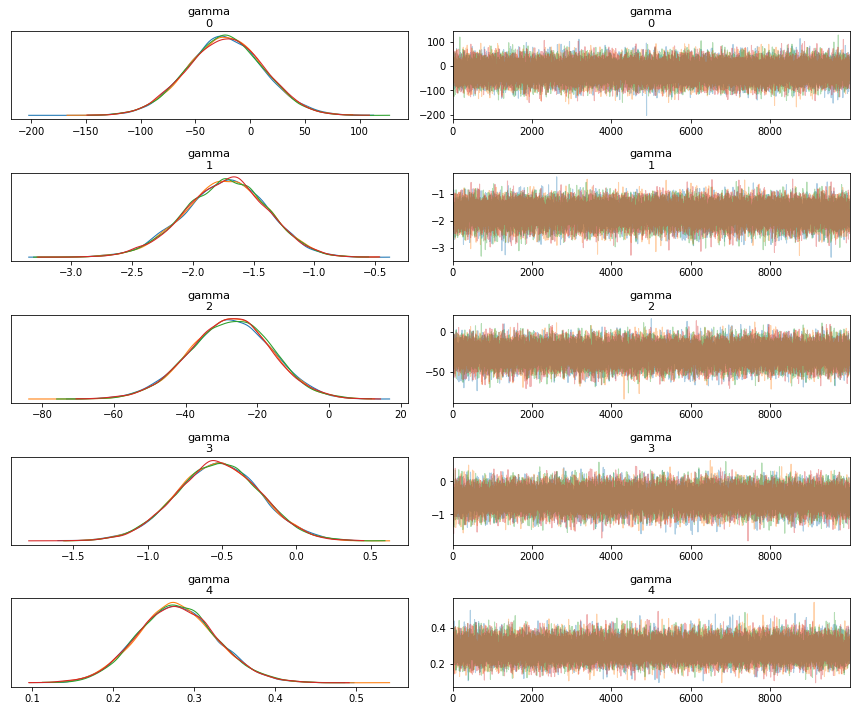

In [ ]:
az.plot_trace(model.posterior.beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.gamma, compact=False)
plt.tight_layout()
plt.show()

In [ ]:
np.sum(model.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

<xarray.Dataset>
Dimensions:      (beta_dim_0: 5, gamma_dim_0: 5)
Coordinates:
  * beta_dim_0   (beta_dim_0) int64 0 1 2 3 4
  * gamma_dim_0  (gamma_dim_0) int64 0 1 2 3 4
Data variables:
    beta         (beta_dim_0) float64 3.95e+04 3.913e+04 ... 3.82e+04 3.603e+04
    gamma        (gamma_dim_0) float64 3.976e+04 3.545e+04 ... 3.698e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc652ddd0>,
      dtype=object)

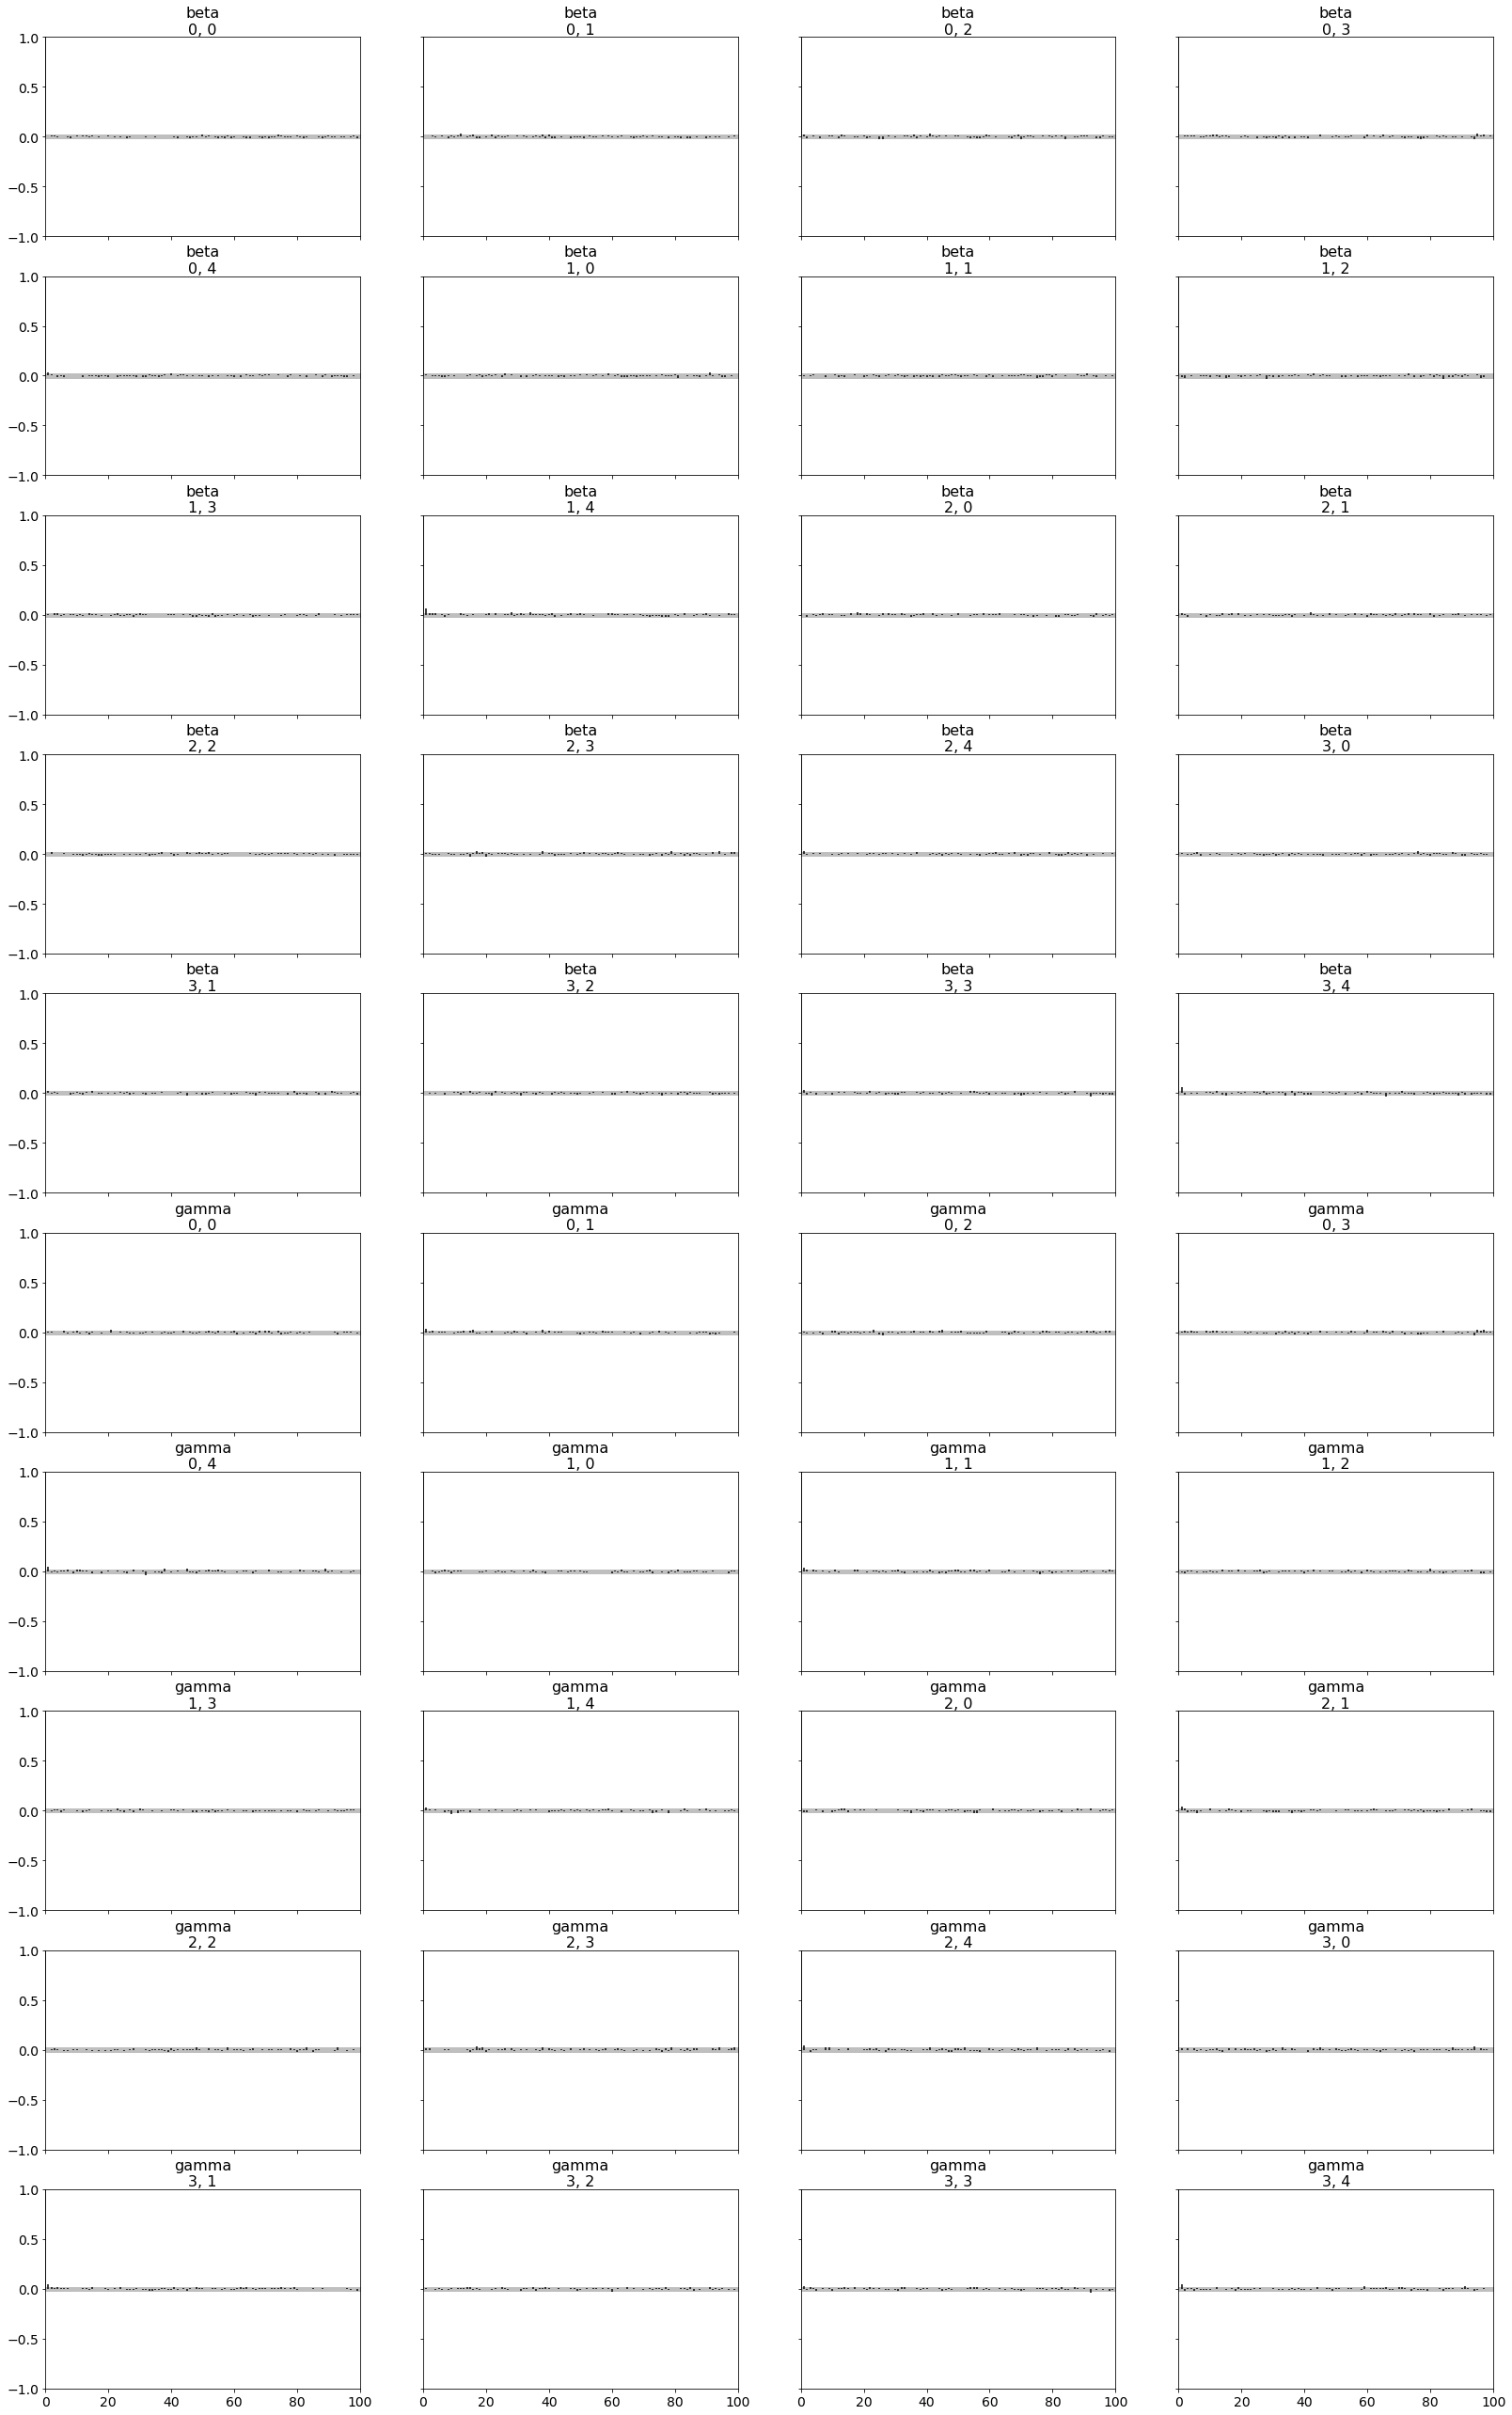

In [ ]:
import arviz as az

chains_az = az.convert_to_inference_data(
    {"beta": model.posterior.beta[:, :, :], "gamma": model.posterior.gamma[:, :, :]})

print(az.ess(chains_az))

az.plot_autocorr(chains_az)
plt.show()

In [ ]:
print("WAIC: ", az.waic(model, var_name="log_lik"))

WAIC:  Computed from 40000 by 505 log-likelihood matrix

          Estimate       SE
elpd_waic  -431.65    23.29
p_waic      119.88        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1460: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


# ZIP_simple

In [ ]:
ZIP_model_simple = """
functions {
  /**
  * Return the log probability of phi with a sparse representation for the adjacency matrix
  *
  *
  * @param phi Vector containing the logarithm of mu (vector)
  * @param tau_epsilon Precision parameter for epsilon (real)
  * @param X Design matrix (matrix)
  * @param WX Product of adjacency matrix and design matrix (matrix)
  * @param beta Vector of coefficient (vector)
  * @param gamma Vector of spillovers (vector)
  * @param lambda Dependence (usually spatial) parameter (real)
  * @param W_sparse Sparse representation of adjacency matrix (int array)
  * @param N Length of phi (int)
  * @param W_n Number of adjacent pairs (int)
  * @param D_sparse Number of neighbors for each location (vector)
  * @param eigen Eigenvalues of W (vector)
  *
  * @return Log probability density of phi up to additive constant
  */
  real sparse_car_lpdf(vector phi, real tau_epsilon, matrix X, matrix WX, vector beta, vector gamma, real lambda, 
    int[,] W_sparse, vector D_sparse, vector eigen, int N, int W_n) {
      vector[N] Wphi;
      vector[N] temp; 
      vector[N] ldet_terms;
    
      Wphi = rep_vector(0, N);
      for (i in 1:W_n) {
        Wphi[W_sparse[i, 1]] = Wphi[W_sparse[i, 1]] + phi[W_sparse[i, 2]]/D_sparse[W_sparse[i, 1]];
        Wphi[W_sparse[i, 2]] = Wphi[W_sparse[i, 2]] + phi[W_sparse[i, 1]]/D_sparse[W_sparse[i, 2]];
      }
      
      temp = phi - lambda*Wphi - X*beta - WX*gamma;

      for (i in 1:N) ldet_terms[i] = log1m(lambda*eigen[i]);
     
      return 0.5*N*log(tau_epsilon) + sum(ldet_terms) - 0.5*tau_epsilon*(temp)'*(temp);
  }

  int num_zeros(int[] y) {
    int summ = 0;
    for (n in 1:size(y))
      summ += (y[n] == 0);
    return summ;
  }

}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
    vector[N] eigen;        // eigenvalues of W

}

transformed data {
  int<lower = 0> N_zero = num_zeros(Y);
  int<lower = 1> y_nonzero[N - N_zero];
  int N_nonzero = 0;
  int<lower=0,upper=1> zero_zeros[N_zero];
  int<lower=0,upper=1> zero_nonzeros[N - N_zero];
  int<lower=0,upper=1> uno_zeros[N_zero];

  for (n in 1:N) {
    if (Y[n] == 0){
       continue;
       }
    N_nonzero += 1;
    y_nonzero[N_nonzero] = Y[n];
    zero_nonzeros[N_nonzero] = 0;
  }

  for (n in 1:N_zero) {
    zero_zeros[n] = 0;
    uno_zeros[n] = 1;
  }


}

parameters {
    vector[N] phi;
    vector[p] beta;
    vector[p] gamma;   
    real<lower=0, upper=1> lambda;
    real<lower=0, upper=1> theta;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  
  vector[N - N_zero] phi_nonzeros;
  real<lower=0> tau_epsilon;
  tau_epsilon=1/sigma_epsilon^2;
  vector[N_zero] prob_zeros;
  
  matrix[N,p] WX;
  vector[N] WX_col;
  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

  if (N_zero != 0) {
    int i0 = 0;
    int i1 = 0;
    for (n in 1:N) {
      if (Y[n] == 0){
         i0 += 1;
         prob_zeros[i0] = log_sum_exp(bernoulli_lpmf(1 | theta),
                        bernoulli_lpmf(0 | theta)
                          + poisson_lpmf(0 | exp(phi[n])));
         continue;
      }
      i1 += 1;
      phi_nonzeros[i1] = phi[n];

    }
   }

}

model {
    target += prob_zeros;
    target += bernoulli_lpmf(zero_nonzeros | theta);
    target += poisson_lpmf(y_nonzero | exp(phi_nonzeros));
    logit(theta) ~ normal(0.0, 5);
    phi ~ sparse_car(tau_epsilon, X, WX, beta, gamma, lambda, W_sparse, D_sparse, eigen, N, W_n);
    beta ~ normal(0.0, 50);
    gamma ~ normal(0.0, 50);
    logit(lambda) ~ normal(0.0, 5);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (n in 1:N) {
    if (Y[n] == 0)
      log_lik[n] = log_sum_exp(bernoulli_lpmf(1 | theta),
                            bernoulli_lpmf(0 | theta)
                              + poisson_lpmf(0 | exp(phi[n])));
    else
      log_lik[n] = bernoulli_lpmf(0 | theta)
                  + poisson_lpmf(Y[n] | exp(phi[n]));
  }
}
"""

stan_file = "./ZIP_model_simple.stan"

with open(stan_file, "w") as f:
    print(ZIP_model_simple, file=f)

ZIP_simple = CmdStanModel(stan_file = stan_file)

INFO:cmdstanpy:compiling stan program, exe file: /content/ZIP_model_simple
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /content/ZIP_model_simple


In [ ]:
ZIP_simple_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
    "eigen": eigen,
}


ZIP_simple_fit = ZIP_simple.sample(data=ZIP_simple_data, chains=4, parallel_chains=4,
                             iter_warmup=5000, iter_sampling=10000, show_progress = 1, adapt_delta = 0.9 )

ZIP_simple_cmdstanpy = az.from_cmdstanpy(ZIP_simple_fit)

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 1 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 1 - warmup:   0%|          | 0/15000 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/15000 [00:00<?, ?it/s]


Chain 4 - warmup:   0%|          | 0/15000 [00:00<?, ?it/s]


Chain 1 - warmup:   1%|          | 100/15000 [03:26<8:32:19,  2.06s/it]

Chain 3 - warmup:   1%|          | 100/15000 [03:31<8:44:02,  2.11s/it]


Chain 1 - warmup:   1%|▏         | 200/15000 [04:33<5:06:40,  1.24s/it]

Chain 3 - warmup:   1%|▏         | 200/15000 [04:40<5:15:16,  1.28s/it]


Chain 2 - warmup:   2%|▏         | 300/15000 [05:24<3:45:40,  1.09it/s]

Chain 1 - warmup:   3%|▎         | 400/15000 [06:04<2:52:50,  1.41it/s]


Chain 2 - warmup:   3%|▎         | 400/15000 [06:08<2:57:51,  1.37it/s]

Chain 3 - warmup:   3%|▎         | 400/15000 [06:10<2:55:09,  1.39it/s]

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple.pkl', 'wb') as f:
    pickle.dump(ZIP_simple, f)

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_fit.pkl', 'wb') as g:
    pickle.dump(ZIP_simple_fit, g)

# PostProcessing ZIP_simple

In [ ]:
# load a pre-compiled model

model_fit = pickle.load(open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_fit.pkl', 'rb'))
model = az.from_cmdstanpy(model_fit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89e14f8dd0>,
      dtype=object)

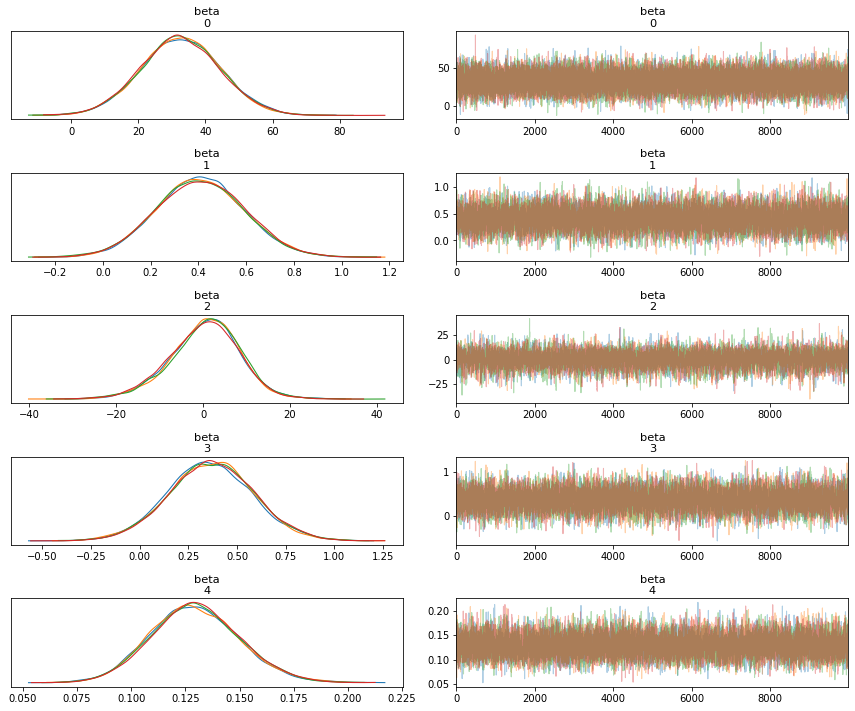

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d6ed3550>,
      dtype=object)

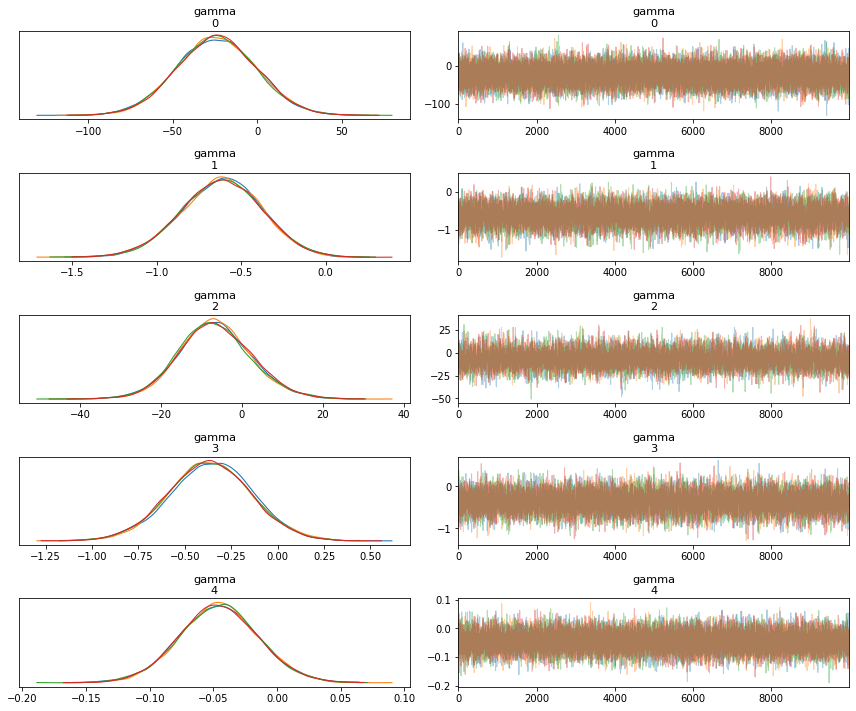

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d5088a10>,
      dtype=object)

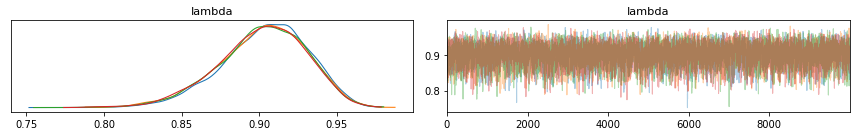

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d4ddd690>,
      dtype=object)

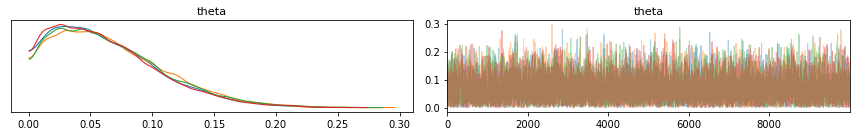

In [ ]:
az.plot_trace(model.posterior.beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.gamma, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior['lambda'], compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.theta, compact=False)
plt.tight_layout()
plt.show()

In [ ]:
np.sum(model.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

<xarray.Dataset>
Dimensions:      (beta_dim_0: 5, gamma_dim_0: 5)
Coordinates:
  * beta_dim_0   (beta_dim_0) int64 0 1 2 3 4
  * gamma_dim_0  (gamma_dim_0) int64 0 1 2 3 4
Data variables:
    beta         (beta_dim_0) float64 2.119e+04 8.756e+03 ... 6.007e+03
    gamma        (gamma_dim_0) float64 1.969e+04 8.333e+03 ... 1.476e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc927c810>,
      dtype=object)

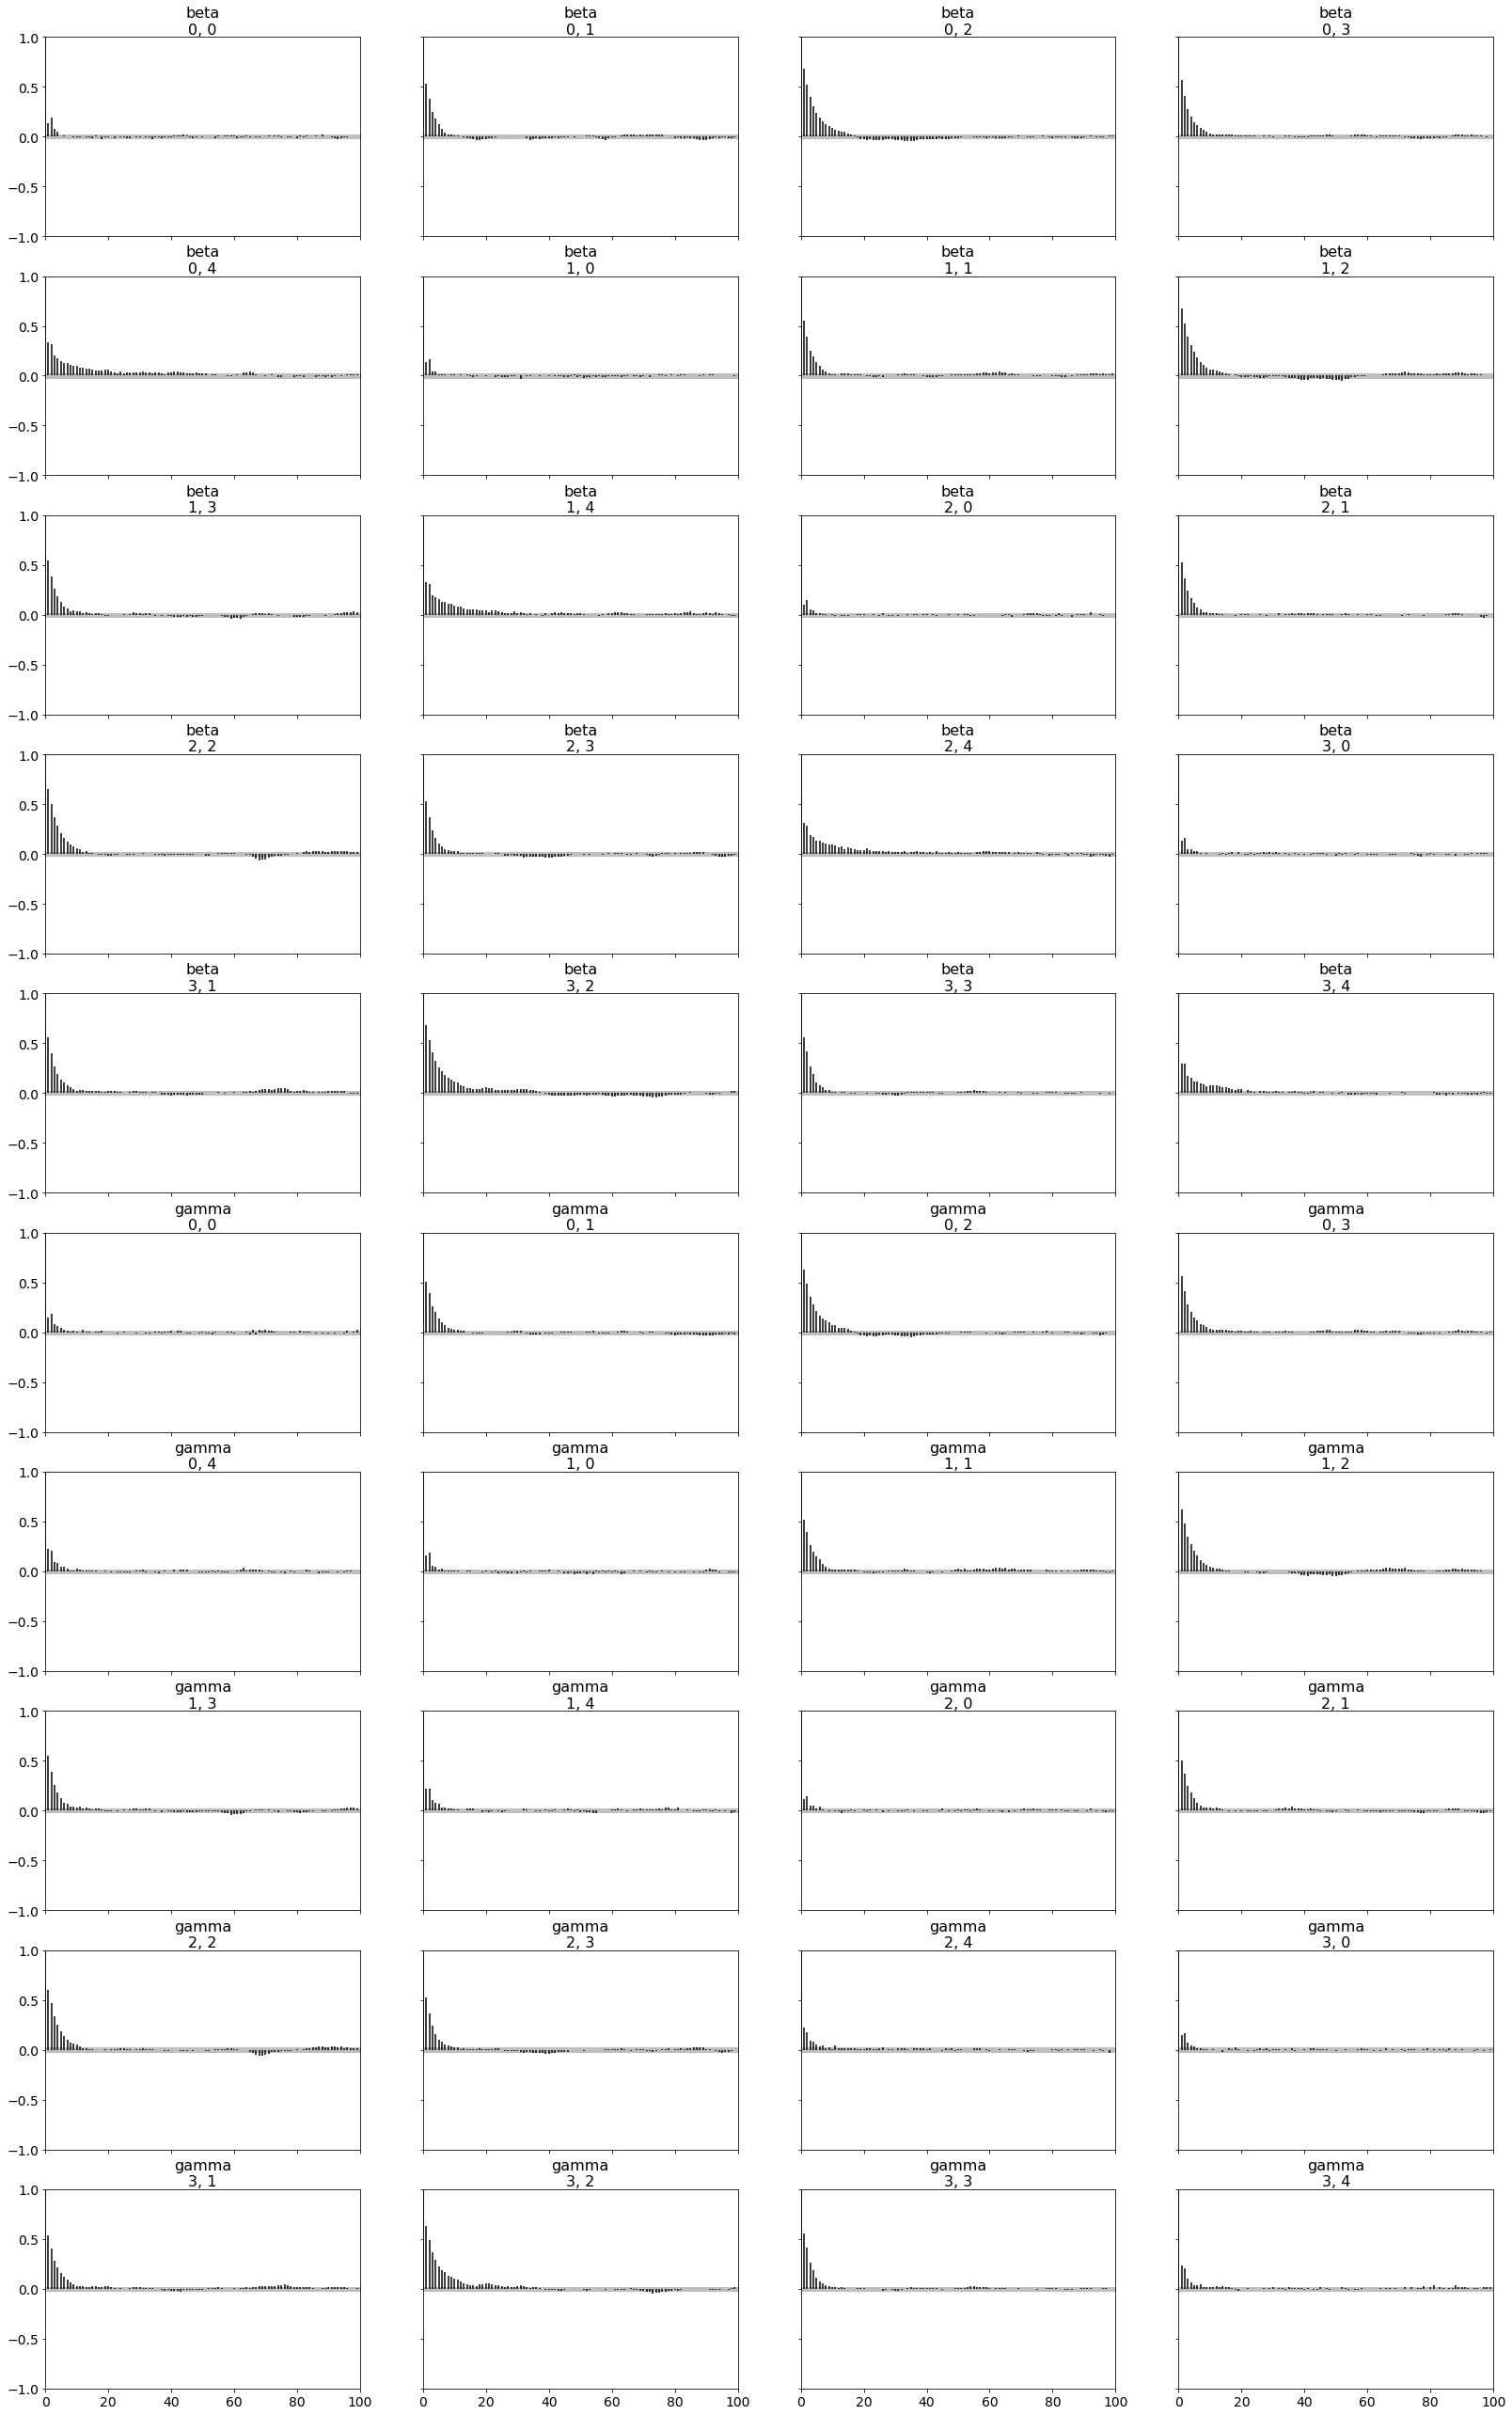

In [ ]:
import arviz as az

chains_az = az.convert_to_inference_data(
    {"beta": model.posterior.beta[:, :, :], "gamma": model.posterior.gamma[:, :, :]})

print(az.ess(chains_az))

az.plot_autocorr(chains_az)
plt.show()

In [ ]:
print("WAIC: ", az.waic(model, var_name="log_lik"))

WAIC:  Computed from 40000 by 505 log-likelihood matrix

          Estimate       SE
elpd_waic  -389.49    25.14
p_waic       88.00        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1460: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


# ZIP_simple_baseline1

In [ ]:
ZIP_model_simple_baseline1 = """

functions {
  int num_zeros(int[] y) {
    int summ = 0;
    for (n in 1:size(y))
      summ += (y[n] == 0);
    return summ;
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
}

transformed data {
  int<lower = 0> N_zero = num_zeros(Y);
  int<lower = 1> y_nonzero[N - N_zero];
  int N_nonzero = 0;
  int<lower=0,upper=1> zero_zeros[N_zero];
  int<lower=0,upper=1> zero_nonzeros[N - N_zero];
  int<lower=0,upper=1> uno_zeros[N_zero];

  for (n in 1:N) {
    if (Y[n] == 0){
       continue;
       }
    N_nonzero += 1;
    y_nonzero[N_nonzero] = Y[n];
    zero_nonzeros[N_nonzero] = 0;
  }

  for (n in 1:N_zero) {
    zero_zeros[n] = 0;
    uno_zeros[n] = 1;
  }

}



parameters {
    vector[N] epsilon;
    vector[p] beta;
    vector[p] beta_2;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  vector[N] phi;
  vector[N - N_zero] phi_nonzeros;
  real<lower=0,upper=1> theta_nonzeros[N - N_zero];
  vector<lower=0,upper=1>[N] theta;
  vector[N_zero] prob_zeros;

  theta = inv_logit(X*beta_2);
  phi = X*beta + epsilon;

  if (N_zero != 0) {
    int i0 = 0;
    int i1 = 0;
    for (n in 1:N) {
      if (Y[n] == 0){
         i0 += 1;
         prob_zeros[i0] = log_sum_exp(bernoulli_lpmf(1 | theta[n]),
                        bernoulli_lpmf(0 | theta[n])
                          + poisson_lpmf(0 | exp(phi[n])));
         continue;
      }
      i1 += 1;
      phi_nonzeros[i1] = phi[n];
      theta_nonzeros[i1] = theta[n];

    }
   } 

}

model {   
    target += prob_zeros;
    target += bernoulli_lpmf(zero_nonzeros | theta_nonzeros);
    target += poisson_lpmf(y_nonzero | exp(phi_nonzeros));
    beta ~ normal(0.0, 50);
    beta_2 ~ normal(0.0, 50);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (n in 1:N) {
    if (Y[n] == 0)
      log_lik[n] = log_sum_exp(bernoulli_lpmf(1 | theta[n]),
                            bernoulli_lpmf(0 | theta[n])
                              + poisson_lpmf(0 | exp(phi[n])));
    else
      log_lik[n] = bernoulli_lpmf(0 | theta[n])
                  + poisson_lpmf(Y[n] | exp(phi[n]));
  }
}
"""

stan_file = "./ZIP_model_simple_baseline1.stan"

with open(stan_file, "w") as f:
    print(ZIP_model_simple_baseline1, file=f)

ZIP_simple_baseline1 = CmdStanModel(stan_file = stan_file)

INFO:cmdstanpy:compiling stan program, exe file: /content/ZIP_model_simple_baseline1
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /content/ZIP_model_simple_baseline1


In [ ]:
ZIP_simple_baseline1_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
}

ZIP_simple_baseline1_fit = ZIP_simple_baseline1.sample(data=ZIP_simple_baseline1_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=10000, show_progress = 1, adapt_delta = 0.9)

ZIP_simple_baseline1_cmdstanpy = az.from_cmdstanpy(ZIP_simple_baseline1_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_baseline1.pkl', 'wb') as f:
    pickle.dump(ZIP_simple_baseline1, f)

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_baseline1_fit.pkl', 'wb') as g:
    pickle.dump(ZIP_simple_baseline1_fit, g)

# ZIP_simple_baseline2

In [ ]:
ZIP_model_simple_baseline2 = """

functions {
  int num_zeros(int[] y) {
    int summ = 0;
    for (n in 1:size(y))
      summ += (y[n] == 0);
    return summ;
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
}

transformed data {
  int<lower = 0> N_zero = num_zeros(Y);
  int<lower = 1> y_nonzero[N - N_zero];
  int N_nonzero = 0;
  int<lower=0,upper=1> zero_zeros[N_zero];
  int<lower=0,upper=1> zero_nonzeros[N - N_zero];
  int<lower=0,upper=1> uno_zeros[N_zero];

  for (n in 1:N) {
    if (Y[n] == 0){
       continue;
       }
    N_nonzero += 1;
    y_nonzero[N_nonzero] = Y[n];
    zero_nonzeros[N_nonzero] = 0;
  }

  for (n in 1:N_zero) {
    zero_zeros[n] = 0;
    uno_zeros[n] = 1;
  }

}

parameters {
    vector[N] epsilon;
    vector[p] beta;
    vector[p] beta_2;
    vector[p] gamma;
    vector[p] gamma_2;
    real<lower=0> sigma_epsilon;
}

transformed parameters {
  vector[N] phi;
  vector[N - N_zero] phi_nonzeros;
  real<lower=0,upper=1> theta_nonzeros[N - N_zero];
  vector<lower=0,upper=1>[N] theta;
  vector[N_zero] prob_zeros;
  matrix[N,p] WX;
  vector[N] WX_col;

  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

  theta = inv_logit(X*beta_2 + WX*gamma_2);
  phi = X*beta +  WX*gamma + epsilon;

  if (N_zero != 0) {
    int i0 = 0;
    int i1 = 0;
    for (n in 1:N) {
      if (Y[n] == 0){
         i0 += 1;
         prob_zeros[i0] = log_sum_exp(bernoulli_lpmf(1 | theta[n]),
                        bernoulli_lpmf(0 | theta[n])
                          + poisson_lpmf(0 | exp(phi[n])));
         continue;
      }
      i1 += 1;
      phi_nonzeros[i1] = phi[n];
      theta_nonzeros[i1] = theta[n];

    }
   }  

}

model {   
    target += prob_zeros;
    target += bernoulli_lpmf(zero_nonzeros | theta_nonzeros);
    target += poisson_lpmf(y_nonzero | exp(phi_nonzeros));
    beta ~ normal(0.0, 50);
    beta_2 ~ normal(0.0, 50);
    gamma ~ normal(0.0, 50);
    gamma_2 ~ normal(0.0, 50);
    epsilon ~ normal(0.0, sigma_epsilon);
    sigma_epsilon ~ uniform(0.0, 100.0);
}

generated quantities  {
  vector[N] log_lik;
  for (n in 1:N) {
    if (Y[n] == 0)
      log_lik[n] = log_sum_exp(bernoulli_lpmf(1 | theta[n]),
                            bernoulli_lpmf(0 | theta[n])
                              + poisson_lpmf(0 | exp(phi[n])));
    else
      log_lik[n] = bernoulli_lpmf(0 | theta[n])
                  + poisson_lpmf(Y[n] | exp(phi[n]));
  }
}
"""

stan_file = "./ZIP_model_simple_baseline2.stan"

with open(stan_file, "w") as f:
    print(ZIP_model_simple_baseline2, file=f)

ZIP_simple_baseline2 = CmdStanModel(stan_file = stan_file)

INFO:cmdstanpy:compiling stan program, exe file: /content/ZIP_model_simple_baseline2
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /content/ZIP_model_simple_baseline2


In [ ]:
ZIP_simple_baseline2_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
}

ZIP_simple_baseline2_fit = ZIP_simple_baseline2.sample(data=ZIP_simple_baseline2_data, chains=4, parallel_chains=4,
                             iter_warmup=1000, iter_sampling=10000, show_progress = 1, adapt_delta = 0.9)

ZIP_simple_baseline2_cmdstanpy = az.from_cmdstanpy(ZIP_simple_baseline2_fit)

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 2 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 1 - warmup:   0%|          | 0/6000 [00:00<?, ?it/s]

Chain 3 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]

Chain 2 - warmup:   0%|          | 0/6000 [00:00<?, ?it/s]


Chain 4 - warmup:   0%|          | 0/1 [00:00<?, ?it/s]


Chain 2 - warmup:   2%|▏         | 100/6000 [01:49<1:47:11,  1.09s/it]

Chain 2 - warmup:   3%|▎         | 200/6000 [02:34<1:09:13,  1.40it/s]


Chain 1 -   done:   3%|▎         | 200/6000 [02:50<1:03:04,  1.53it/s]

KeyboardInterrupt: ignored



Chain 3 -   done:   2%|▏         | 100/6000 [02:50<2:10:44,  1.33s/it]


Chain 4 -   done:   2%|▏         | 100/6000 [02:49<2:34:00,  1.57s/it]

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_baseline2.pkl', 'wb') as f:
    pickle.dump(ZIP_simple_baseline2, f)

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_baseline2_fit.pkl', 'wb') as g:
    pickle.dump(ZIP_simple_baseline2_fit, g)

# ZIP_simple_baseline3

In [ ]:
ZIP_model_simple_baseline3 = """

functions {
  int num_zeros(int[] y) {
    int summ = 0;
    for (n in 1:size(y))
      summ += (y[n] == 0);
    return summ;
  }
}

data {
    int<lower=0> N; 
    int<lower=0> p; 
    
    int<lower=0> Y[N];
    matrix[N,p] X;
    matrix<lower=0, upper=1>[N,N] I;
    int W_n;                //Number of adjacent regions pairs
    int W_sparse[W_n,2];    // adjacency pairs
    vector[N] D_sparse;     // Number of neighbors for each location
}

transformed data {
  int<lower = 0> N_zero = num_zeros(Y);
  int<lower = 1> y_nonzero[N - N_zero];
  int N_nonzero = 0;
  int<lower=0,upper=1> zero_zeros[N_zero];
  int<lower=0,upper=1> zero_nonzeros[N - N_zero];
  int<lower=0,upper=1> uno_zeros[N_zero];

  for (n in 1:N) {
    if (Y[n] == 0){
       continue;
       }
    N_nonzero += 1;
    y_nonzero[N_nonzero] = Y[n];
    zero_nonzeros[N_nonzero] = 0;
  }

  for (n in 1:N_zero) {
    zero_zeros[n] = 0;
    uno_zeros[n] = 1;
  }

}

parameters {
    vector[p] beta;
    vector[p] beta_2;
    vector[p] gamma;
    vector[p] gamma_2;
}

transformed parameters {
  vector[N] phi;
  vector[N - N_zero] phi_nonzeros;
  real<lower=0,upper=1> theta_nonzeros[N - N_zero];
  vector<lower=0,upper=1>[N] theta;
  vector[N_zero] prob_zeros;
  matrix[N,p] WX;
  vector[N] WX_col;

  for (j in 1:p){
  WX_col = rep_vector(0, N);
    for (i in 1:W_n) {
        WX_col[W_sparse[i, 1]] = WX_col[W_sparse[i, 1]] + X[W_sparse[i, 2],j]/D_sparse[W_sparse[i, 1]];
        WX_col[W_sparse[i, 2]] = WX_col[W_sparse[i, 2]] + X[W_sparse[i, 1],j]/D_sparse[W_sparse[i, 2]];
    }
    WX[,j] = WX_col;
  }

  theta = inv_logit(X*beta_2 + WX*gamma_2);
  phi = X*beta +  WX*gamma ;

  if (N_zero != 0) {
    int i0 = 0;
    int i1 = 0;
    for (n in 1:N) {
      if (Y[n] == 0){
         i0 += 1;
         prob_zeros[i0] = log_sum_exp(bernoulli_lpmf(1 | theta[n]),
                        bernoulli_lpmf(0 | theta[n])
                          + poisson_lpmf(0 | exp(phi[n])));
         continue;
      }
      i1 += 1;
      phi_nonzeros[i1] = phi[n];
      theta_nonzeros[i1] = theta[n];

    }
   }  

}

model {   
    target += prob_zeros;
    target += bernoulli_lpmf(zero_nonzeros | theta_nonzeros);
    target += poisson_lpmf(y_nonzero | exp(phi_nonzeros));
    beta ~ normal(0.0, 50);
    beta_2 ~ normal(0.0, 50);
    gamma ~ normal(0.0, 50);
    gamma_2 ~ normal(0.0, 50);
}

generated quantities  {
  vector[N] log_lik;
  for (n in 1:N) {
    if (Y[n] == 0)
      log_lik[n] = log_sum_exp(bernoulli_lpmf(1 | theta[n]),
                            bernoulli_lpmf(0 | theta[n])
                              + poisson_lpmf(0 | exp(phi[n])));
    else
      log_lik[n] = bernoulli_lpmf(0 | theta[n])
                  + poisson_lpmf(Y[n] | exp(phi[n]));
  }
}
"""

stan_file = "./ZIP_model_simple_baseline3.stan"

with open(stan_file, "w") as f:
    print(ZIP_model_simple_baseline3, file=f)

ZIP_simple_baseline3 = CmdStanModel(stan_file = stan_file)

INFO:cmdstanpy:compiling stan program, exe file: /content/ZIP_model_simple_baseline3
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /content/ZIP_model_simple_baseline3


In [ ]:
ZIP_simple_baseline3_data = {
    "N": len(y),
    "p": X.shape[1],
    "Y": y.to_numpy(),
    "X": X.to_numpy(),
    "I": np.eye(len(y)),
    "W_n": len(W_sparse),
    "W_sparse": W_sparse,
    "D_sparse": D_sparse,
}

ZIP_simple_baseline3_fit = ZIP_simple_baseline3.sample(data=ZIP_simple_baseline3_data, chains=4, parallel_chains=4,
                             iter_warmup=5000, iter_sampling=10000, show_progress = 1, adapt_delta = 0.9)

ZIP_simple_baseline3_cmdstanpy = az.from_cmdstanpy(ZIP_simple_baseline3_fit)

In [ ]:
# Save the model and the sampling

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_baseline3.pkl', 'wb') as f:
    pickle.dump(ZIP_simple_baseline3, f)

with open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_baseline3_fit.pkl', 'wb') as g:
    pickle.dump(ZIP_simple_baseline3_fit, g)

# PostProcessing ZIP_simple_baseline3

In [ ]:
# load a pre-compiled model

model_fit = pickle.load(open('mnt/MyDrive/Project_X Bayesian/ZIP_simple_baseline3_fit.pkl', 'rb'))
model = az.from_cmdstanpy(model_fit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc9a17bd0>,
      dtype=object)

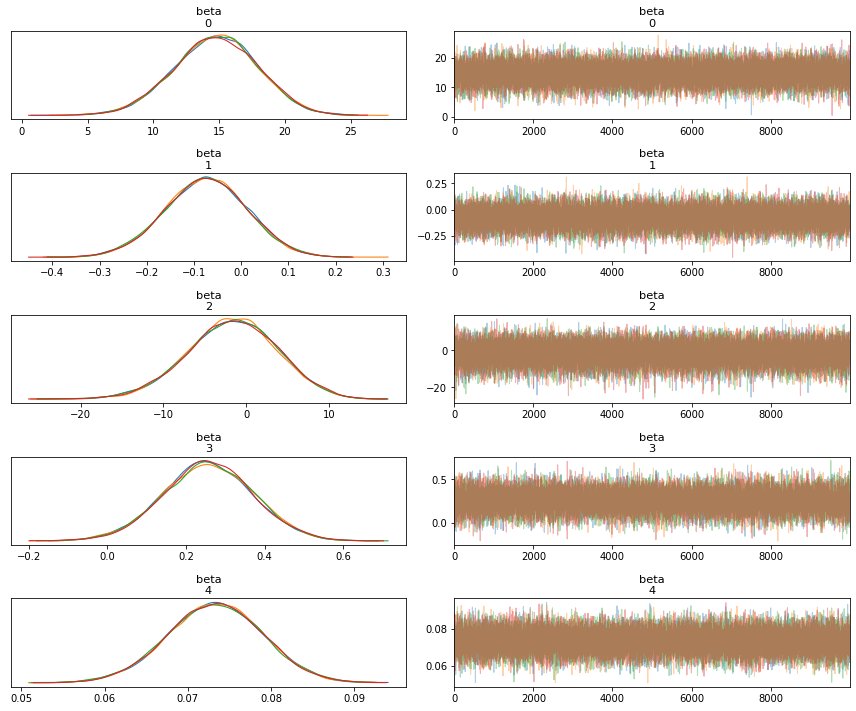

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc85b2290>,
      dtype=object)

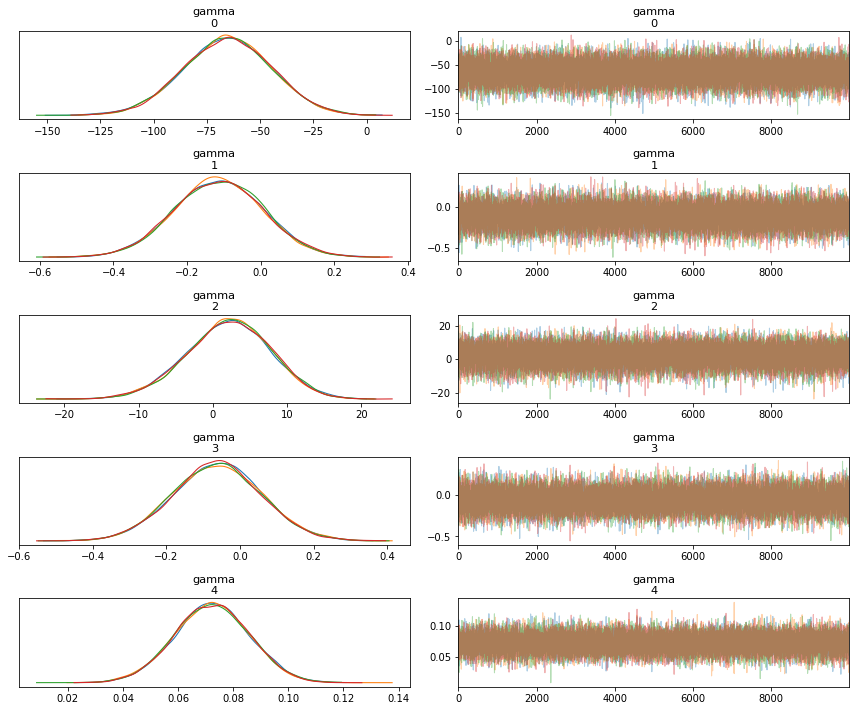

In [ ]:
az.plot_trace(model.posterior.beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.gamma, compact=False)
plt.tight_layout()
plt.show()

In [ ]:
np.sum(model.sample_stats.diverging)

<xarray.DataArray 'diverging' ()>
array(0)

In [ ]:
import arviz as az

chains_az = az.convert_to_inference_data(
    {"beta": model.posterior.beta[:, :, :], "gamma": model.posterior.gamma[:, :, :],
     "sigma_beta": model.posterior.sigma_beta[:, :], "sigma_gamma": model.posterior.sigma_gamma[:, :], "sigma_lambda": model.posterior.sigma_epsilon[:, :]})

print(az.ess(chains_az))

az.plot_autocorr(chains_az)
plt.show()

AttributeError: ignored

In [ ]:
print("WAIC: ", az.waic(model, var_name="log_lik"))

WAIC:  Computed from 40000 by 505 log-likelihood matrix

          Estimate       SE
elpd_waic  -379.61    24.71
p_waic       90.13        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1460: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


# PostProcessing

In [ ]:
# load a pre-compiled model

model_fit = pickle.load(open('mnt/MyDrive/Project_X Bayesian/PSAR_very_sparse_simple_fit.pkl', 'rb'))
model = az.from_cmdstanpy(model_fit)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f066e0a0710>,
      dtype=object)

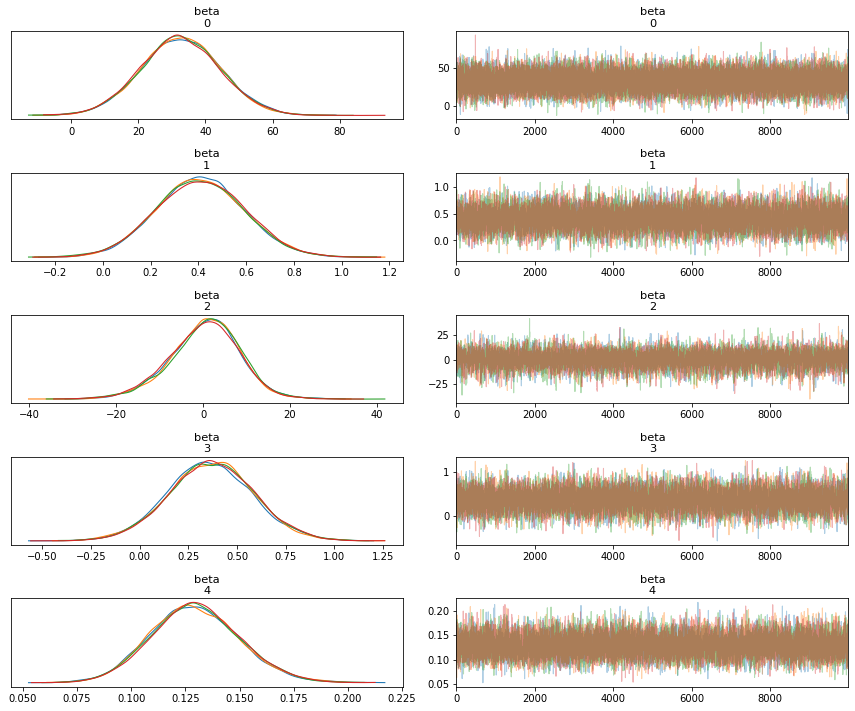

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0677680bd0>,
      dtype=object)

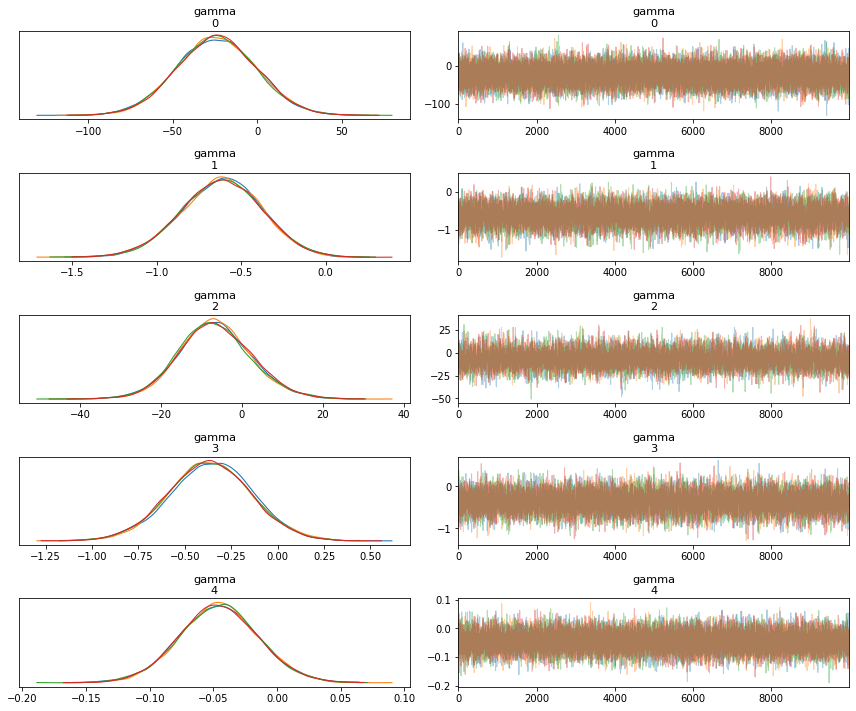

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06785b5510>,
      dtype=object)

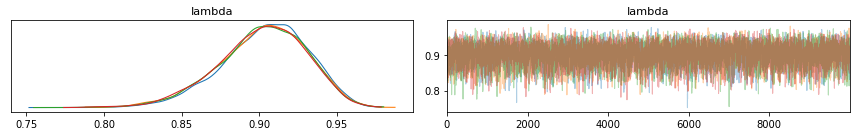

AttributeError: ignored

In [ ]:
az.plot_trace(model.posterior.beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.gamma, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior['lambda'], compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.sigma_beta, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.sigma_gamma, compact=False)
plt.tight_layout()
plt.show()

az.plot_trace(model.posterior.sigma_epsilon, compact=False)
plt.tight_layout()
plt.show()

In [ ]:
plt.plot(model.posterior.beta[1, :25, 0], model.posterior.beta[1, :25, 1])   #first is the chain, second the iterations and third the betas
plt.show()

In [ ]:
import seaborn as sns
fig = plt.figure()
for i in range(5):
    sns.kdeplot(model.posterior.beta[:, :, i].values.reshape(-1, ), label = "beta" + str(i+1))
plt.legend()
plt.show()

fig = plt.figure()
for i in range(5):
    sns.kdeplot(model.posterior.gamma[:, :, i].values.reshape(-1, ), label = "gamma" + str(i+1))
plt.legend()
plt.show()

fig = plt.figure()
sns.kdeplot(model.posterior["lambda"][:, :, i].values.reshape(-1, ), label = "gamma" + str(i+1))
plt.legend()
plt.show()

fig = plt.figure()
sns.kdeplot(model.posterior.sigma_beta[:, :].values.reshape(-1, ), label = "sigma_beta")
sns.kdeplot(model.posterior.sigma_gamma[:, :].values.reshape(-1, ), label = "sigma_gamma")
sns.kdeplot(model.posterior.sigma_epsilon[:, :].values.reshape(-1, ), label = "sigma_epsilon")
plt.legend()
plt.show()

In [ ]:
np.sum(model.sample_stats.diverging)

In [ ]:
# beta
az.stats.diagnostics.ess(model, method="bulk").beta
az.stats.diagnostics.ess(model, method="tail").beta
az.stats.diagnostics.rhat(model).beta
az.rhat(model).beta

# gamma
az.stats.diagnostics.ess(model, method="bulk").gamma
az.stats.diagnostics.ess(model, method="tail").gamma
az.stats.diagnostics.rhat(model).gamma
az.rhat(model).gamma

#lambda
az.stats.diagnostics.ess(model, method="bulk")['lambda']
az.stats.diagnostics.ess(model, method="tail")['lambda']
az.stats.diagnostics.rhat(model)['lambda']
az.rhat(model)['lambda']

# sigma_beta
az.stats.diagnostics.ess(model, method="bulk").sigma_beta
az.stats.diagnostics.ess(model, method="tail").sigma_beta
az.stats.diagnostics.rhat(model).sigma_beta
az.rhat(model).sigma_beta

# sigma_gamma
az.stats.diagnostics.ess(model, method="bulk").sigma_gamma
az.stats.diagnostics.ess(model, method="tail").sigma_gamma
az.stats.diagnostics.rhat(model).sigma_gamma
az.rhat(model).sigma_gamma

# sigma_epsilon
az.stats.diagnostics.ess(model, method="bulk").sigma_epsilon
az.stats.diagnostics.ess(model, method="tail").sigma_epsilon
az.stats.diagnostics.rhat(model).sigma_epsilon
az.rhat(model).sigma_epsilon

In [ ]:
print(az.hdi(model, 0.95, var_names=["beta"])) #CI0.95(beta)
print(az.hdi(model, 0.95, var_names=["gamma"]))
print(az.hdi(model, 0.95, var_names=["lambda"]))
print(az.hdi(model, 0.95, var_names=["sigma_beta"]))
print(az.hdi(model, 0.95, var_names=["sigma_gamma"]))
print(az.hdi(model, 0.95, var_names=["sigma_epsilon"]))

In [ ]:
# lower is a vector of the lower points of CI

# upper is a vector of the lower points of CI

# labels is a vector with the name on the y axis

def plot_interval(lower, upper, labels, colour = "red"):
  data_dict = {}
  data_dict['category'] = labels
  data_dict['lower'] = lower
  data_dict['upper'] = upper
  dataset = pd.DataFrame(data_dict)

  for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color=colour)
  plt.yticks(range(len(dataset)), list(dataset['category']))

plot_interval()

In [ ]:
import arviz as az

chains_az = az.convert_to_inference_data(
    {"beta": model.posterior.beta[:, :, :], "gamma": model.posterior.gamma[:, :, :],
     "sigma_beta": model.posterior.sigma_beta[:, :], "sigma_gamma": model.posterior.sigma_gamma[:, :], "sigma_lambda": model.posterior.sigma_epsilon[:, :]})

print(az.ess(chains_az))

az.plot_autocorr(chains_az)
plt.show()

In [ ]:
print("WAIC: ", az.waic(model, var_name="log_lik"))

WAIC:  Computed from 40000 by 505 log-likelihood matrix

          Estimate       SE
elpd_waic  -379.61    24.71
p_waic       90.13        -

There has been a warning during the calculation. Please check the results.


/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:1460: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


In [ ]:
print("LOO: ", az.loo(model, var_name="log_lik"))

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:695: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "


LOO:  Computed from 40000 by 505 log-likelihood matrix

         Estimate       SE
elpd_loo  -426.02    28.64
p_loo      124.53        -

There has been a warning during the calculation. Please check the results.


# Models comparison

In [ ]:
az.compare({"Complete Model": model1 , "Baseline1": model2, "Baseline2": model3})

/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:927: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:695: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  "Estimated shape parameter of Pareto distribution is greater than 0.7 for "
/usr/local/lib/python3.7/dist-packages/arviz/stats/stats.py:695: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior

rank         loo       p_loo  ...        dse  warning  loo_scale
Complete Model     0 -423.098943  133.616748  ...   0.000000     True        log
Baseline2          1 -495.577037  183.806912  ...  10.941867     True        log
Baseline1          2 -509.359024  195.143900  ...  11.784682     True        log

[3 rows x 9 columns]

# Posterior Predictive Distribution

In [ ]:
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions
def predictive_PSAR_baseline2(x_star, chains, ygrid):
  betas = np.vstack(chains.posterior.beta)
  gammas = np.vstack(chains.posterior.gamma)
  WX = np.dot(W,x_star)
  means = [np.exp(betas[i] @ np.transpose(x_star) + WX @ np.transpose(gammas[i])) for i in range(len(betas))]
  out = np.random.poisson(means)
  return out

In [ ]:
pred = predictive_PSAR_baseline2(X, model, y)
aux = pred.ravel()

new_pred = [min(p, 30) for p in aux]

In [ ]:
new_y = y.ravel()
plt.hist(y, weights=np.ones(len(new_y)) / len(new_y))
plt.hist(new_pred, weights=np.ones(len(new_pred)) / len(new_pred))

In [ ]:
def geoplot2(feature_name, df, geojson):
  max_value = df[feature_name].max()
  fig = go.Figure(go.Choroplethmapbox(geojson=geojson, locations=df["id"], z=df[feature_name],
                                      colorscale="Viridis", zmin=0, zmax=max_value,
                                      marker_opacity=0.6, marker_line_width=0))
  fig.update_geos(fitbounds="locations", visible=False)
  fig.update_layout(mapbox_style="carto-positron",
                    mapbox_zoom=4.3, mapbox_center = {"lat": 11, "lon": 15.3})
  fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
  fig.show()
geoplot2("con_2015", df, j_file)

In [ ]:
means = [np.mean(pred[:,i]) for i in range(505)]

def geoplot2(feature_name, df, geojson):
  fig = go.Figure(go.Choroplethmapbox(geojson=geojson, locations=df["id"], z=means,
                                      colorscale="Viridis", zmin=0, zmax=30,
                                      marker_opacity=0.6, marker_line_width=0))
  fig.update_geos(fitbounds="locations", visible=False)
  fig.update_layout(mapbox_style="carto-positron",
                    mapbox_zoom=4.3, mapbox_center = {"lat": 11, "lon": 15.3})
  fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
  fig.show()
geoplot2("con_2015", df, j_file)
